**Disclaimer:** Dataset and homework are made up for educational purposes.

**Dataset:** `wiki_machine_learning.csv`

**Description:** The data represents how many times the Wikipedia page of "Machine Learning" was read during a certain period of time. The data is presented in CSV format with the following columns: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. Null values in the `count` column are represented by 0, and these should be removed during preprocessing.

### Column Explanations

1. **date**: The dates on which the Wikipedia page was read, formatted as `datetime`.
2. **count**: The number of times the page was read. Null values (represented as zeros) must be removed during preprocessing.
3. **lang**: The language of the page (e.g., "en" for English).
4. **page**: The name of the Wikipedia page (in this case, "Machine Learning").
5. **rank**: The ranking of the page based on the number of reads, indicating its popularity.
6. **month**: The month extracted from the date, represented numerically (1-12).
7. **title**: The title of the page (in this case, "Machine Learning").

### Task

You are asked to create a model using **Facebook Prophet** and **Neural Prophet** algorithms to predict how many times the article will be read in the future for the next 30 days (using the `count` column).

**Disclaimer:** Dataset və ev tapşırığı tədris məqsədləri üçün hazırlanmışdır.

**Dataset:** `wiki_machine_learning.csv`

**Təsvir:** Bu məlumat "Maşın Öyrənmə" Wikipedia səhifəsinin müəyyən bir dövr ərzində neçə dəfə oxunduğunu göstərir. Məlumat CSV formatında aşağıdakı sütunlarla təqdim olunur: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. `count` sütunundakı null dəyərlər 0 ilə göstərilir və bunlar preprocessinq zamanı silinməlidir.

### Sütunların Təsvirləri

1. **date**: Wikipedia səhifəsinin oxunduğu tarixlər, `datetime` formatında.
2. **count**: Səhifənin neçə dəfə oxunduğunu göstərir. Null dəyərlər (0 ilə göstərilən) preprocessinq zamanı silinməlidir.
3. **lang**: Səhifənin dili (məsələn, "en" ingilis dili üçün).
4. **page**: Wikipedia səhifəsinin adı (bu halda "Maşın Öyrənmə").
5. **rank**: Oxunma sayına əsasən səhifənin reytinqi, onun populyarlığını göstərir.
6. **month**: Tarixdən çıxarılan ay, ədədi şəkildə (1-12) göstərilir.
7. **title**: Səhifənin adı (bu halda "Maşın Öyrənmə").

### Tapşırıq

Sizdən **Facebook Prophet** və **Neural Prophet** alqoritmlərini istifadə edərək `count` sütunundan istifadə edərək gələcək 30 gün ərzində səhifənin neçə dəfə oxunacağını proqnozlaşdıran bir model yaratmağınız xahiş olunur.

In [1]:
import warnings  # Xəbərdarlıqları idarə etmək üçün lazımlı kitabxananı yükləyir
import itertools  # İterasiya alətləri üçün lazımlı kitabxana
import numpy as np  # Sayısal hesablamalar üçün Numpy kitabxanasını yükləyir
import matplotlib.pyplot as plt  # Qrafiklər çəkmək üçün Matplotlib-in pyplot modülünü yükləyir
warnings.filterwarnings("ignore")  # Xəbərdarlıqları gizlətmək üçün istifadə olunur
plt.style.use('fivethirtyeight')  # Qrafiklərin stilini 'fivethirtyeight' stili ilə təyin edir
import pandas as pd  # Məlumat analizi üçün Pandas kitabxanasını yükləyir
import matplotlib  # Matplotlib kitabxanasını qlobal parametrləri dəyişmək üçün yükləyir

# Qrafik oxlarının etiket ölçüsünü təyin edir
matplotlib.rcParams['axes.labelsize'] = 14  
# X oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['xtick.labelsize'] = 12  
# Y oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['ytick.labelsize'] = 12  
# Bütün mətnlərin rəngini qara edir
matplotlib.rcParams['text.color'] = 'k'  


In [2]:
import copy
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\wiki_machine_learning.csv', sep=' ')
df = copy.deepcopy(data.reset_index(drop=True))
df

date  count lang              page  rank   month             title
0    2015-01-01   1414   en  Machine_learning  8708  201501  Machine_learning
1    2015-01-02   1920   en  Machine_learning  8708  201501  Machine_learning
2    2015-01-03   1338   en  Machine_learning  8708  201501  Machine_learning
3    2015-01-04   1404   en  Machine_learning  8708  201501  Machine_learning
4    2015-01-05   2264   en  Machine_learning  8708  201501  Machine_learning
..          ...    ...  ...               ...   ...     ...               ...
379  2016-01-16   1644   en  Machine_learning  8708  201601  Machine_learning
380  2016-01-17   1836   en  Machine_learning  8708  201601  Machine_learning
381  2016-01-18   2983   en  Machine_learning  8708  201601  Machine_learning
382  2016-01-19   3389   en  Machine_learning  8708  201601  Machine_learning
383  2016-01-20   3559   en  Machine_learning  8708  201601  Machine_learning

[384 rows x 7 columns]

### 1. Data Type Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 21.1+ KB


In [4]:
df.columns

Index(['date', 'count', 'lang', 'page', 'rank', 'month', 'title'], dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: date
Non-Null Count  Dtype         
--------------  -----         
384 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 KB


In [7]:
df['month'] = pd.to_datetime(df.month, format='%Y%m').dt.strftime('%Y-%B')

In [8]:
df.month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
384 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [9]:
df

date  count lang              page  rank         month  \
0   2015-01-01   1414   en  Machine_learning  8708  2015-January   
1   2015-01-02   1920   en  Machine_learning  8708  2015-January   
2   2015-01-03   1338   en  Machine_learning  8708  2015-January   
3   2015-01-04   1404   en  Machine_learning  8708  2015-January   
4   2015-01-05   2264   en  Machine_learning  8708  2015-January   
..         ...    ...  ...               ...   ...           ...   
379 2016-01-16   1644   en  Machine_learning  8708  2016-January   
380 2016-01-17   1836   en  Machine_learning  8708  2016-January   
381 2016-01-18   2983   en  Machine_learning  8708  2016-January   
382 2016-01-19   3389   en  Machine_learning  8708  2016-January   
383 2016-01-20   3559   en  Machine_learning  8708  2016-January   

                title  
0    Machine_learning  
1    Machine_learning  
2    Machine_learning  
3    Machine_learning  
4    Machine_learning  
..                ...  
379  Machine_learning  
380  Machine_learning  
381  Machine_learning  
382  Machine_learning  
383  Machine_learning  

[384 rows x 7 columns]

### 2.Missing values

In [10]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [11]:
df[df['count']==0]

date  count lang              page  rank          month  \
35 2015-02-05      0   en  Machine_learning  8708  2015-February   

               title  
35  Machine_learning

In [12]:
import numpy as np
df['count'] = df['count'].replace(to_replace=0, value=np.nan)

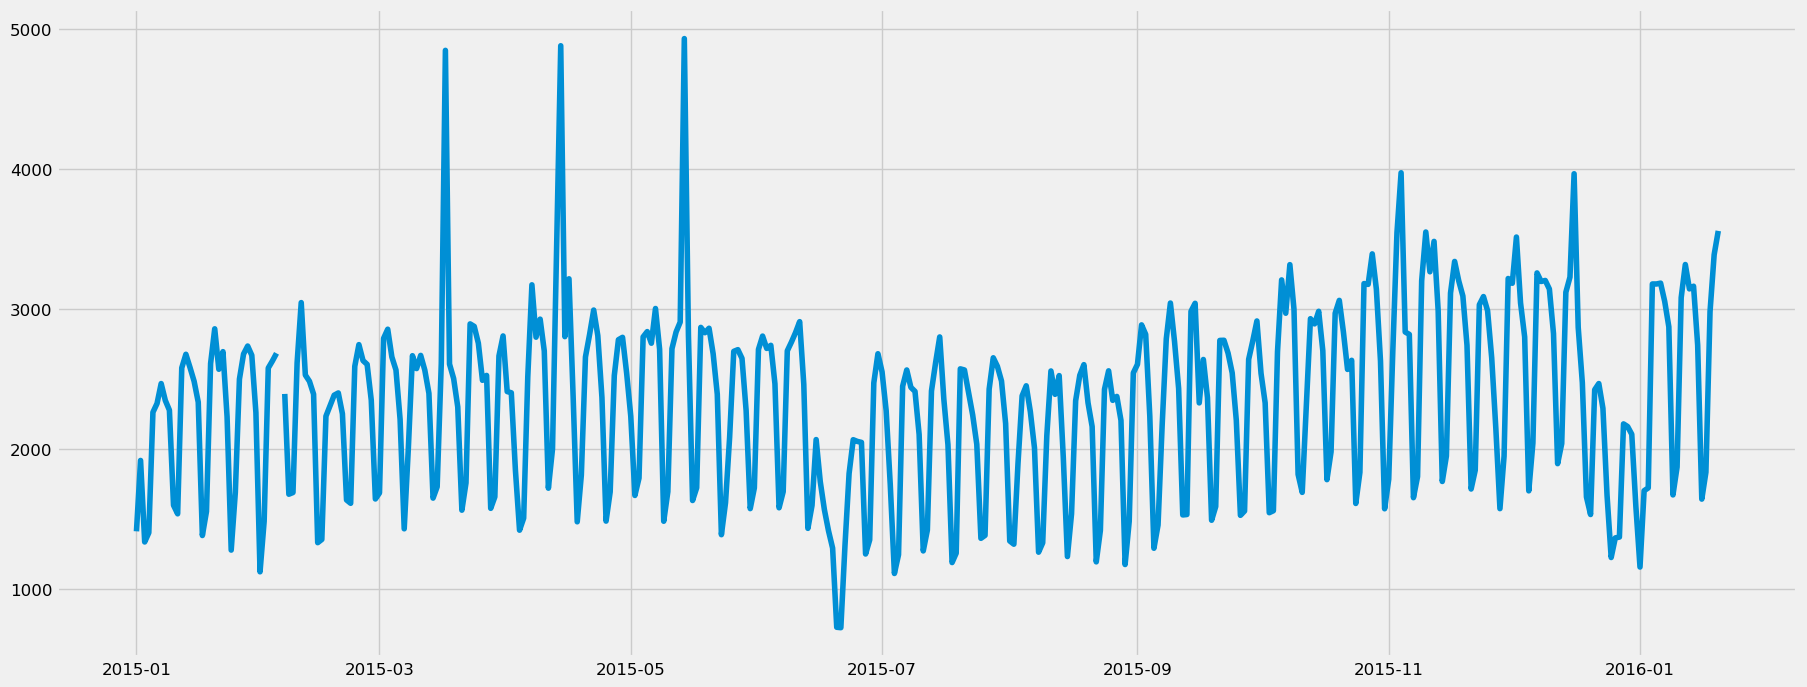

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])

### Null value fill

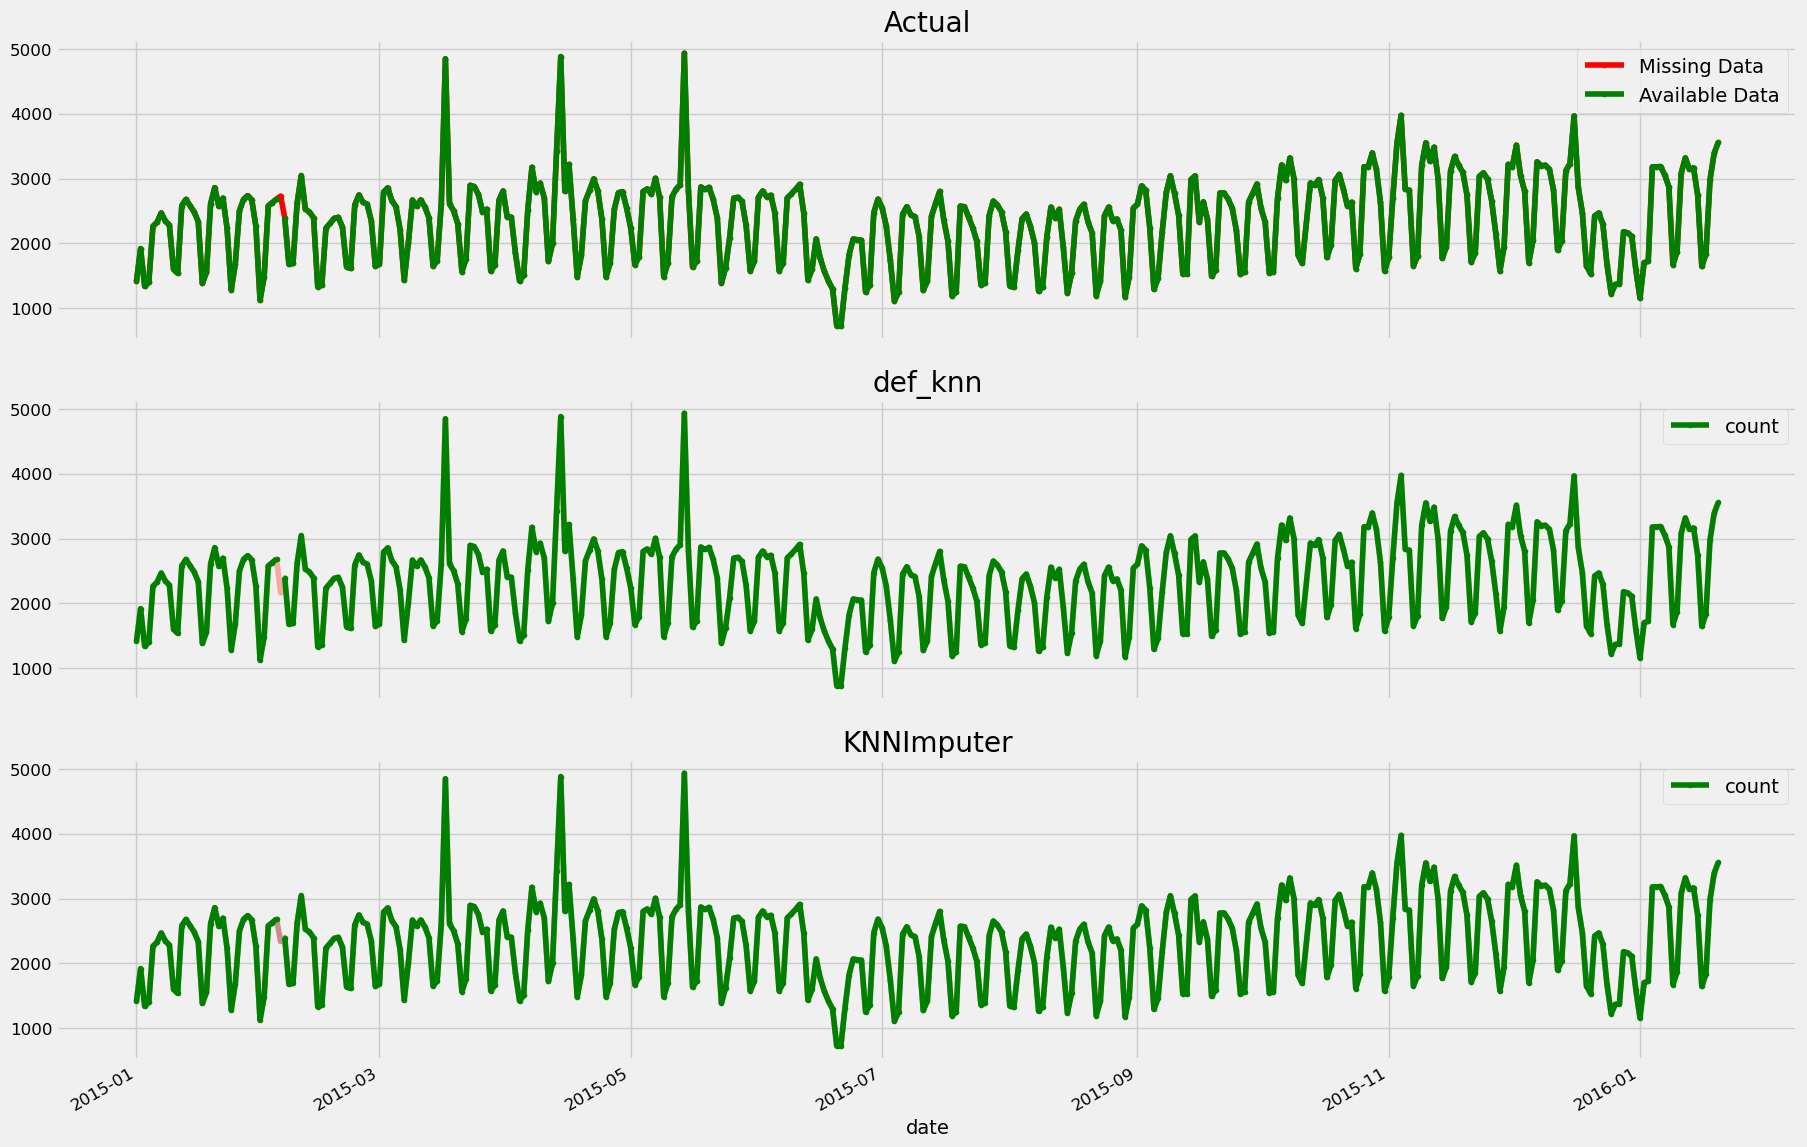

In [14]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20, 15))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df[['date', 'count']].set_index('date').interpolate (method = 'cubic').\
                                        plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df[['date', 'count']].set_index('date').plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

knn_result = knn_mean(df['count'], 8)
axes[1].plot(df['date'], knn_result, label='KNN Mean', color='tomato', alpha=0.5, linestyle='-')
df[['date', 'count']].set_index('date').plot(title='def_knn', ax=axes[1], label='Actual', color='green', style=".-")

### Elave
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[['count']]))
axes[2].plot(df['date'], df_knn_imputed, label='KNNImputer', color='brown', alpha=0.5, linestyle="-")
df[['date', 'count']].set_index('date').plot(title='KNNImputer', ax=axes[2], label='Actual', color='green', style=".-")
plt.show()

In [15]:
df.isnull().sum()

date     0
count    1
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

### KNNImputer Null Value Fill 

In [16]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df['count'] = knn_imputer.fit_transform(df[['count']])

In [17]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

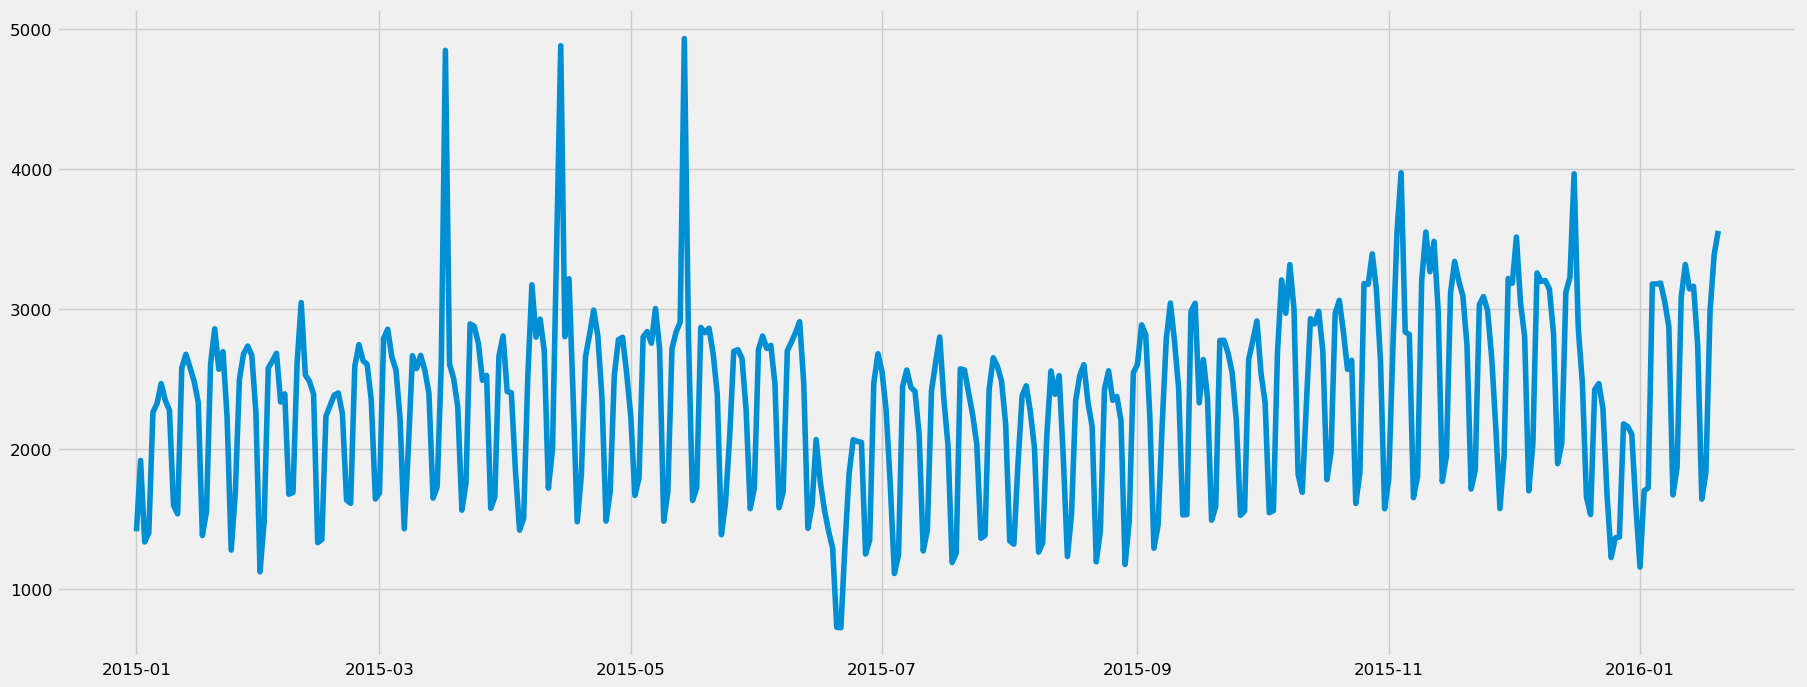

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])
plt.show()

### Daytime Time Series every Year PLot

In [19]:
# Prepare data
df_yr = copy.deepcopy(df.set_index('date'))

df_yr['year'] = [d.year for d in df_yr.index]
df_yr['day'] = [d.strftime('%m%d') for d in df_yr.index]
years = df_yr['year'].unique()

In [20]:
import numpy as np
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)

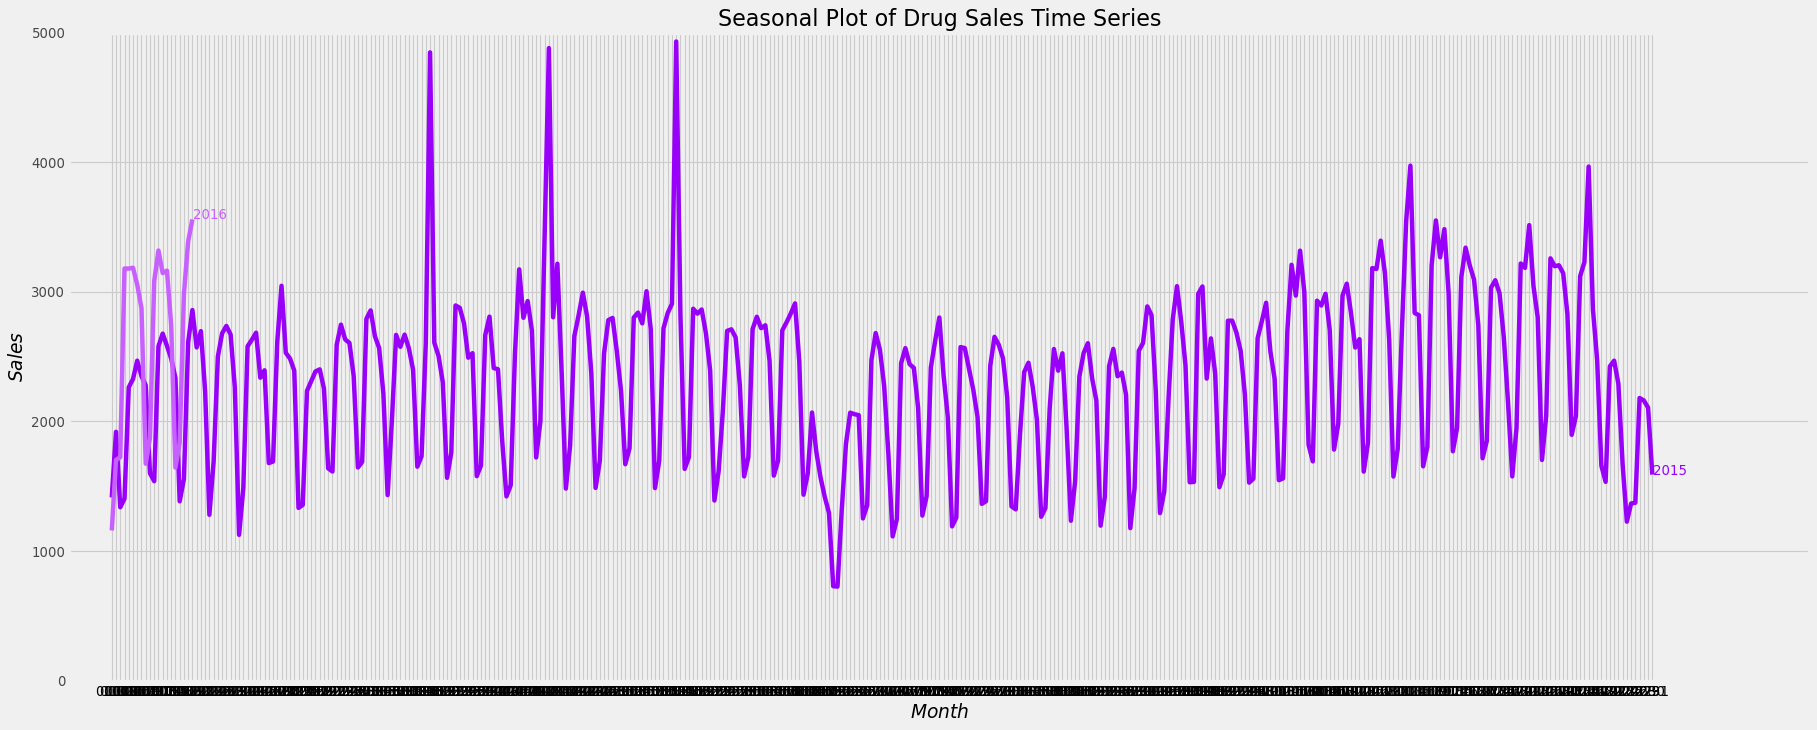

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Draw Plot
plt.figure(figsize=(25, 10), dpi=80)
for i, y in enumerate(years):
    if i >= 0:
        plt.plot('day', 'count', data=df_yr.loc[df_yr.year==y, :], color=mycolors[i], label=y)
        plt.text(df_yr.loc[df_yr.year==y, :].shape[0]-.9, df_yr.loc[df_yr.year==y, 'count'][-1:].values[0], y, fontsize=12, 
                                                                                             color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-10, 400), ylim=(0, 5000), ylabel='$Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Monthly Time Series every Year BoxPLot

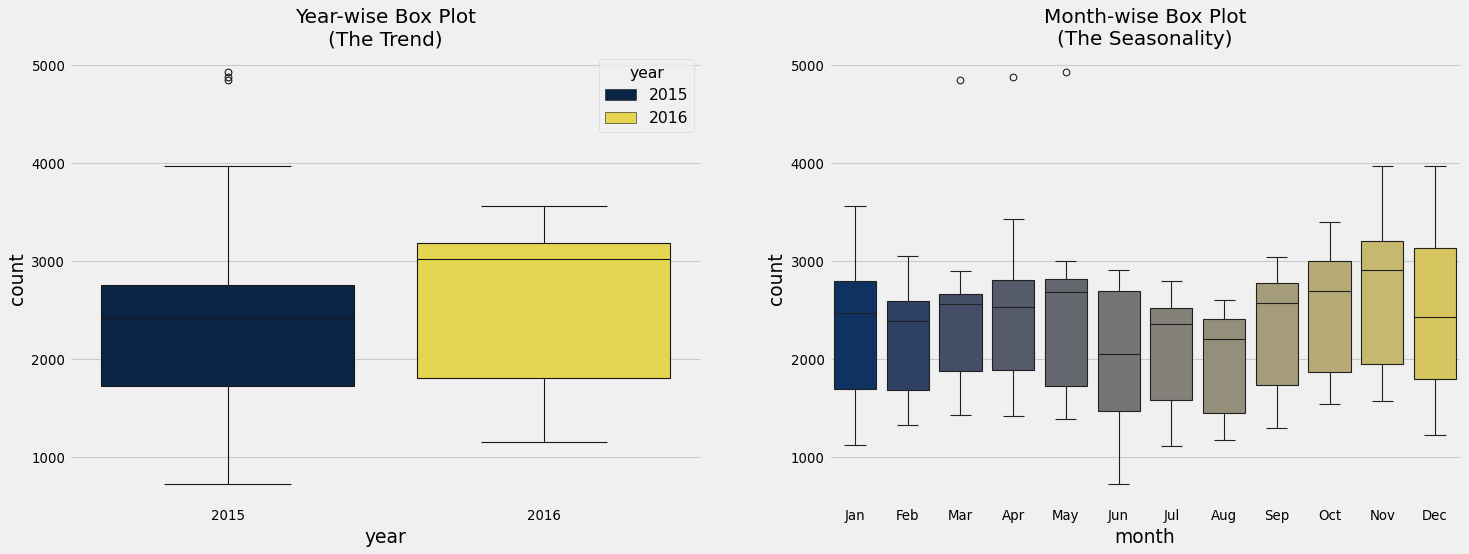

In [22]:
# Prepare data
import seaborn as sns
df_date = copy.deepcopy(df.set_index('date'))

df_date['year'] = [d.year for d in df_date.index]
df_date['month'] = [d.strftime('%b') for d in df_date.index]
years = df_date['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='count', data=df_date, ax=axes[0], hue='year', palette='cividis')
sns.boxplot(x='month', y='count', data=df_date.loc[~df_date.year.isin([1991, 2008]), :], ax=axes[1], hue='month',
                                                                                            palette='cividis')

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Montly Bar Plot

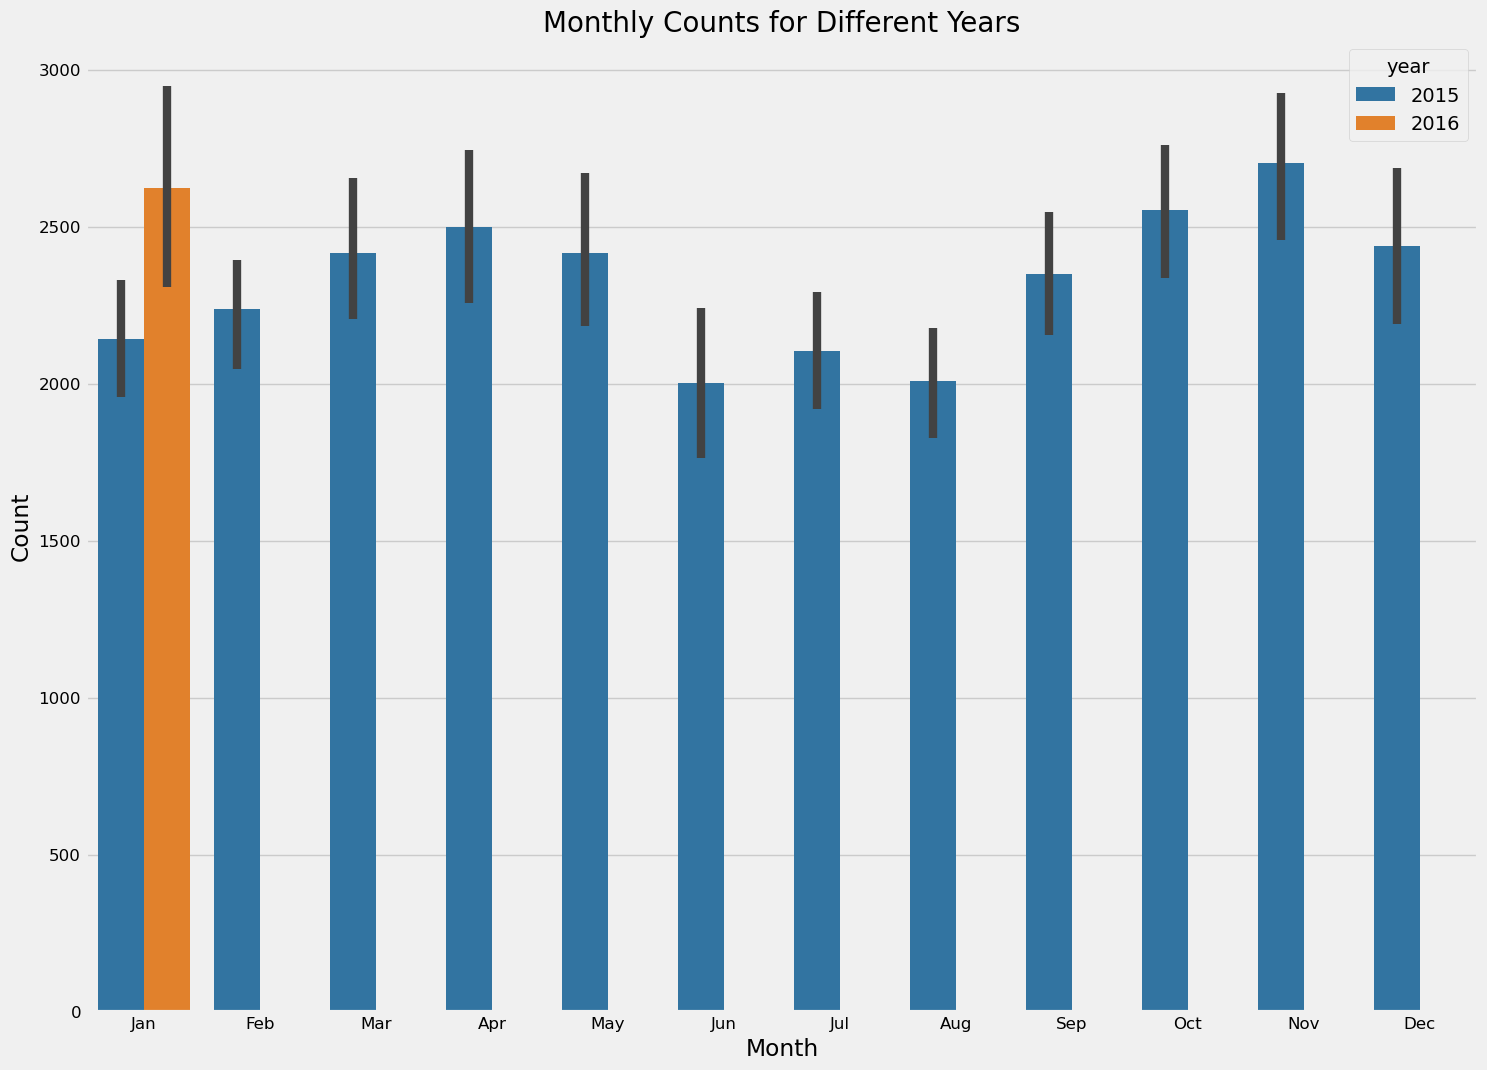

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.barplot(x='month', y='count', hue='year', data=df_date, palette="tab10")
plt.title("Monthly Counts for Different Years", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


### Test for Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

In [25]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir


ADF Statistic: -3.295191241403254
p-value: 0.015094799283876859
Critial Values:
1%, -3.4482453822848496
Critial Values:
5%, -2.8694261442901396
Critial Values:
10%, -2.5709711770439507


### Autocorrelation and Partial Autocorrelation

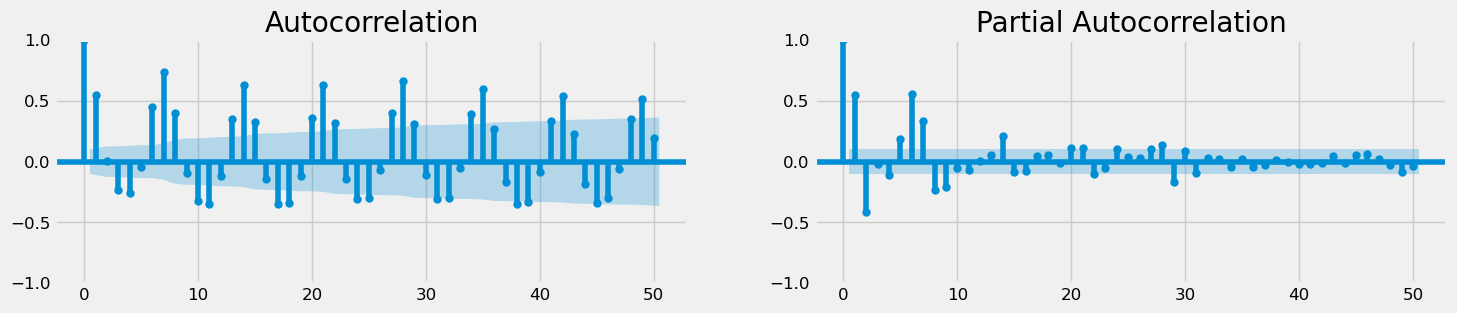

In [26]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 50 gecikməyə qədər ACF və PACF hesablanır - hazırda şərhə alınıb
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# ACF və PACF qrafiklərini çəkmək üçün 1x2 ölçülü subplot yaradırıq
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Məlumatın ACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_acf(df['count'].tolist(), lags=50, ax=axes[0])

# Məlumatın PACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_pacf(df['count'].tolist(), lags=50, ax=axes[1])
plt.show()

## ARIMA MODEL

In [27]:
df_ar = copy.deepcopy(df)
df_ar

date   count lang              page  rank         month  \
0   2015-01-01  1414.0   en  Machine_learning  8708  2015-January   
1   2015-01-02  1920.0   en  Machine_learning  8708  2015-January   
2   2015-01-03  1338.0   en  Machine_learning  8708  2015-January   
3   2015-01-04  1404.0   en  Machine_learning  8708  2015-January   
4   2015-01-05  2264.0   en  Machine_learning  8708  2015-January   
..         ...     ...  ...               ...   ...           ...   
379 2016-01-16  1644.0   en  Machine_learning  8708  2016-January   
380 2016-01-17  1836.0   en  Machine_learning  8708  2016-January   
381 2016-01-18  2983.0   en  Machine_learning  8708  2016-January   
382 2016-01-19  3389.0   en  Machine_learning  8708  2016-January   
383 2016-01-20  3559.0   en  Machine_learning  8708  2016-January   

                title  
0    Machine_learning  
1    Machine_learning  
2    Machine_learning  
3    Machine_learning  
4    Machine_learning  
..                ...  
379  Machine_learning  
380  Machine_learning  
381  Machine_learning  
382  Machine_learning  
383  Machine_learning  

[384 rows x 7 columns]

### Addım 1: Stasionarlıq yoxlanışı və düzəldilməsi
- Zaman seriyası stasionar deyilsə, stasionarlıq üçün fərqləndirmə tətbiq edə bilərik (d parametri ilə). Önəmli olan verinin trend və seasonality kimi qeyri-stasionar komponentlərdən təmizlənməsi.

In [28]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df_ar['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir

ADF Statistic: -3.295191241403254
p-value: 0.015094799283876859
Critial Values:
1%, -3.4482453822848496
Critial Values:
5%, -2.8694261442901396
Critial Values:
10%, -2.5709711770439507


- Əgər seriya stasionar deyilsə, birinci fərqləndirmə tətbiq edərək stasionarlaşdırırıq:

In [29]:
# df_ar['count'] = df_ar['count'].diff().dropna() #ehtiyac deyil stasionardir

### Addım 2: ARIMA model parametrlərinin təyin edilməsi
- ARIMA modelində p, d və q parametrlərini təyin etmək üçün ACF və PACF qrafiklərindən istifadə edə bilərik:

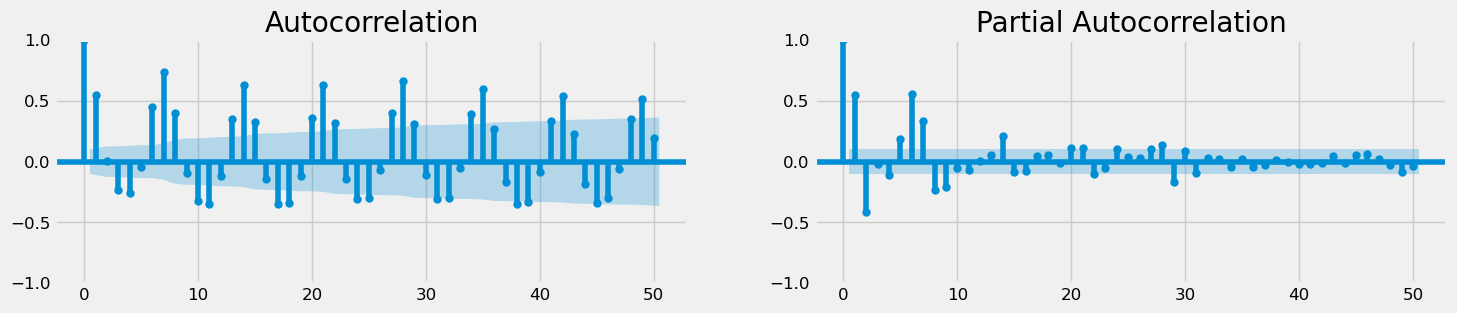

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF və PACF qrafiklərini yarat
fig, axes = plt.subplots(1, 2, figsize=(16, 3))
plot_acf(df_ar['count'].dropna(), lags=50, ax=axes[0])
plot_pacf(df_ar['count'].dropna(), lags=50, ax=axes[1])
plt.show()

In [31]:
# p=1, d=0, q=2  teyin etdim

### Addım 3: ARIMA modelinin qurulması
- ARIMA modelini qurub öyrədək:

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini qur (p, d, q dəyərlərini ACF və PACF-dən götür)
model = ARIMA(df_ar['count'], order=(3, 1, 3))  # p, d, q real dəyərlərlə əvəz edin
model_fit = model.fit()

# Modelin xülasəsini göstər
model_fit.summary()


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  384
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2857.738
Date:                Wed, 23 Oct 2024   AIC                           5729.477
Time:                        22:34:09   BIC                           5757.113
Sample:                             0   HQIC                          5740.440
                                - 384                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4062      0.105     13.353      0.000       1.200       1.613
ar.L2         -1.2034      0.130     -9.225      0.000      -1.459      -0.948
ar.L3          0.1659      0.104      1.589      0.112      -0.039       0.370
ma.L1         -2.0247      0.074    -27.330      0.000      -2.170      -1.880
ma.L2          1.9246      0.101     19.067      0.000       1.727       2.122
ma.L3         -0.7820      0.068    -11.514      0.000      -0.915      -0.649
sigma2      2.374e+05   1.46e+04     16.285      0.000    2.09e+05    2.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):               304.54
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.98
Prob(H) (two-sided):                  0.88   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Addım 4: Növbəti 30 gün üçün proqnoz
- Model öyrədildikdən sonra növbəti 30 gün üçün proqnoz verə bilərsiniz:

In [33]:
# 30 gün proqnoz ver
forecast_ar = model_fit.forecast(steps=30)

# Proqnozu göstərin
forecast_ar


# 30 gün üçün proqnoz və etibar intervalları
forecast_ar = model_fit.forecast(steps=30, alpha=0.05)

# 30 gün üçün proqnoz və etibar intervalları
forecast_results = model_fit.get_forecast(steps=30)  # Proqnoz və etibar intervalını əldə et
# forecast_ar = forecast_results.predicted_mean  # Proqnoz dəyərləri
conf_int = forecast_results.conf_int(alpha=0.05)  # 95% etibar intervalları

# Mövcud data çərçivəsinin son tarixini götürək
last_date = df_ar['date'].iloc[-1]

# Növbəti 30 günün tarixlərini yaratmaq
date_range = pd.date_range(start=last_date, periods=30, freq='D')

# Nəticələri DataFrame-ə yazırıq
forecast_ar = pd.DataFrame({
    'date': date_range,
    'forecast': forecast_ar,
    'lower CI': conf_int.iloc[:, 0],  # Aşağı etibar limiti
    'upper CI': conf_int.iloc[:, 1]   # Yuxarı etibar limiti
})

# Proqnozu və etibar intervallarını göstərin
forecast_ar

date     forecast     lower CI     upper CI
384 2016-01-20  2924.250955  1969.301365  3879.200546
385 2016-01-21  2286.345539  1264.277301  3308.413778
386 2016-01-22  1991.722599   945.740585  3037.704613
387 2016-01-23  2239.811668  1183.783335  3295.840001
388 2016-01-24  2837.414670  1775.701245  3899.128095
389 2016-01-25  3330.327000  2260.819700  4399.834301
390 2016-01-26  3345.433468  2259.895047  4430.971890
391 2016-01-27  2872.620181  1761.500902  3983.739459
392 2016-01-28  2271.340209  1133.828467  3408.851952
393 2016-01-29  1997.331407   842.249164  3152.413650
394 2016-01-30  2257.192325  1093.541100  3420.843550
395 2016-01-31  2852.616292  1683.808460  4021.424123
396 2016-02-01  3331.717314  2155.651620  4507.783008
397 2016-02-02  3331.977506  2141.070585  4522.884427
398 2016-02-03  2854.547057  1640.221411  4068.872703
399 2016-02-04  2262.349942  1024.066872  3500.633012
400 2016-02-05  2004.207087   750.049004  3258.365170
401 2016-02-06  2274.682028  1012.739793  3536.624264
402 2016-02-07  2867.444399  1600.699485  4134.189312
403 2016-02-08  3332.661308  2059.044898  4606.277717
404 2016-02-09  3318.361520  2030.803678  4605.919362
405 2016-02-10  2836.724067  1527.431267  4146.016867
406 2016-02-11  2253.829953   922.510726  3585.149179
407 2016-02-12  2011.416501   665.578968  3357.254035
408 2016-02-13  2292.116572   939.121533  3645.111610
409 2016-02-14  2881.871323  1524.349560  4239.393085
410 2016-02-15  3333.162904  1969.064714  4697.261094
411 2016-02-16  3304.597086  1927.266864  4681.927307
412 2016-02-17  2819.158178  1421.454747  4216.861610
413 2016-02-18  2245.776757   827.630962  3663.922553

### Forecast vs Actual vs Confidence Interval

In [34]:
actual = df_ar[['date', 'count']].set_index('date')
forecast_ar_plot = forecast_ar[['date', 'forecast']].set_index('date')
lower_ci = forecast_ar[['date','lower CI']].set_index('date')
upper_ci = forecast_ar[['date','upper CI']].set_index('date')

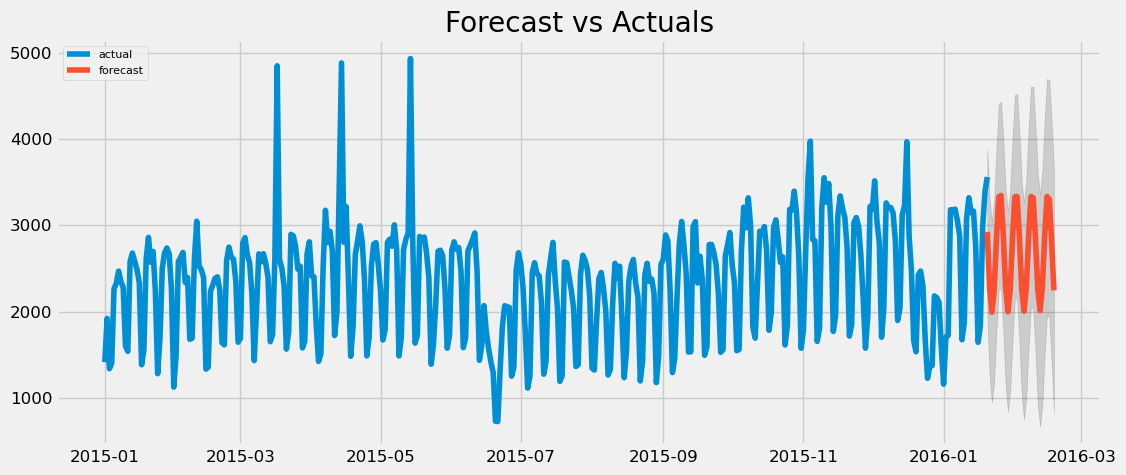

In [35]:
# Qrafik çəkir
plt.figure(figsize=(12,5), dpi=100)  # Şəkilin ölçüsünü və keyfiyyətini təyin edir
plt.plot(actual, label='actual')  # Train datasını qrafikdə çəkir
plt.plot(forecast_ar_plot, label='forecast')  # Real test dəyərlərini qrafikdə göstərir
plt.fill_between(lower_ci.index, lower_ci['lower CI'], upper_ci['upper CI'], 
                 color='k', alpha=.15)  # Etibar intervalını qrafikdə kölgə ilə göstərir
plt.title('Forecast vs Actuals')  # Qrafikin başlığını təyin edir
plt.legend(loc='upper left', fontsize=8)  # Əfsanəni yuxarı sol küncdə göstərir
plt.show()  # Qrafiki göstərir

### Metrics

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,\
                                                                                        root_mean_squared_error

# Real və proqnozlaşdırılmış dəyərlər
# y_true = df[df.date>='2015-01-20']['count'][:30] 
y_true = df['count'][-30:]  # Son 30 günün real dəyərləri (məsələn, data sırasından çıxarılır)
y_pred = forecast_ar['forecast']  # Son 30 günün proqnozlaşdırılmış dəyərləri (ARIMA modelinin nəticələri)


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.7338151980240568
Mean Absolute Error (MAE): 845.9900149994397
Mean Absolute Percentage Error (MAPE): 0.439606068221071
Mean Squared Error (MSE): 967798.268782283
Root Mean Squared Error (RMSE): 983.7673855044611


## PMDARIMA

In [37]:
df_pmdar = copy.deepcopy(df.set_index('date')[['count']])
df_pmdar

count
date              
2015-01-01  1414.0
2015-01-02  1920.0
2015-01-03  1338.0
2015-01-04  1404.0
2015-01-05  2264.0
...            ...
2016-01-16  1644.0
2016-01-17  1836.0
2016-01-18  2983.0
2016-01-19  3389.0
2016-01-20  3559.0

[384 rows x 1 columns]

In [38]:
import pmdarima as pm
model = pm.auto_arima(df_pmdar,
                      start_p=1, # AR (AutoRegressive) komponenti üçün başlanğıc p dəyəri (başlanğıc gecikmə dərəcəsi)
                      start_q=1, # MA (Moving Average) komponenti üçün başlanğıc q dəyəri (başlanğıc gecikmə dərəcəsi)
                      test='adf', # d dəyərini təyin etmək üçün ADF (Augmented Dickey-Fuller) testindən istifadə edir
                      max_p=3,       # p üçün maksimum dəyər (AutoRegressive komponentin maksimum gecikmə dərəcəsi)
                      max_q=3,       # q üçün maksimum dəyər (Moving Average komponentin maksimum gecikmə dərəcəsi)
#                m=1,# Seriyanın tezliyi (1: hər müşahidə bir addım intervalında, mövsümsüz seriya üçün istifadə olunur)
                      d=None,        # d dəyəri (inteqrasiya dərəcəsi) avtomatik təyin olunur
                      seasonal=True,# Mövsümi komponentin nəzərə alınmaması üçün (mövsümsüz model)
                      start_P=0,     # Mövsümi AutoRegressive komponenti (SAR) üçün başlanğıc P dəyəri (sezon p)
                      D=0,           # Mövsümi inteqrasiya komponenti (mövsümi dərəcə) üçün D dəyəri (sezon d)
                      trace=True,    # Modelin təlim prosesi zamanı addımları izlə (parametrləri göstər)
                      error_action='ignore', # Xəta baş verərsə, onu gözardı et (modelin durmaması üçün)
                      suppress_warnings=True, # Xəbərdarlıqları göstərməmək üçün
                      stepwise=True # Addım-addım axtarış alqoritmindən istifadə et, modeli daha sürətli öyrənmək üçün
                     )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6005.076, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6020.984, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6019.066, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6012.904, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6019.016, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5844.700, Time=1.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5969.844, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5841.390, Time=2.92 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5960.320, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.74 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5791.326, Time=2.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5733.860, Time=2.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5733.2

### model.params pmdarima ilə qurulmuş ARIMA modelinin parametrləri

In [39]:
model.params

<bound method ARIMA.params of ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

### Forecast vs Confidence Inteval vs Plot

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


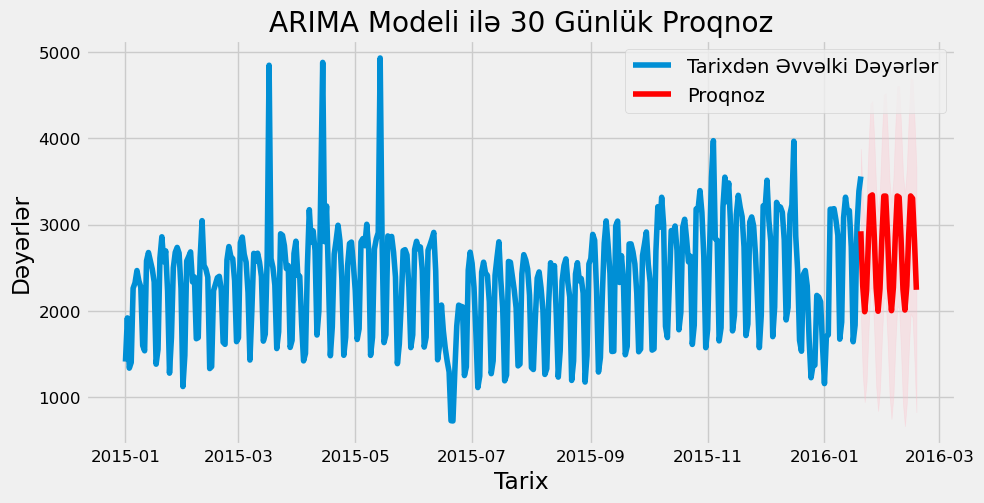

In [40]:
forecast_pmdar, conf_int = model.predict(n_periods=30, return_conf_int=True)

# 7. Proqnoz tarixlərini yaradın (proqnozun son tarixini əlavə edərək)
forecast_dates = pd.date_range(start=df_pmdar.index[-1], periods=30, freq='D', name='date')

# 8. Proqnozları və etibar intervallarını DataFrame olaraq saxlayın
forecast_pmdar = pd.DataFrame({'forecast': forecast_pmdar.values, 'Lower Bound': conf_int[:, 0], 
                            'Upper Bound': conf_int[:, 1]}, index=forecast_dates)

# 9. Nəticələri göstərin
plt.figure(figsize=(10,5))
plt.plot(df_pmdar, label='Tarixdən Əvvəlki Dəyərlər')
plt.plot(forecast_pmdar['forecast'], label='Proqnoz', color='red')
plt.fill_between(forecast_pmdar.index, forecast_pmdar['Lower Bound'], forecast_pmdar['Upper Bound'], color='pink', 
                                                                                                         alpha=0.3)
plt.title('ARIMA Modeli ilə 30 Günlük Proqnoz')
plt.xlabel('Tarix')
plt.ylabel('Dəyərlər')
plt.legend()

In [41]:
forecast_pmdar

forecast  Lower Bound  Upper Bound
date                                             
2016-01-20  2924.250955  1969.301365  3879.200546
2016-01-21  2286.345539  1264.277301  3308.413778
2016-01-22  1991.722599   945.740585  3037.704613
2016-01-23  2239.811668  1183.783335  3295.840001
2016-01-24  2837.414670  1775.701245  3899.128095
2016-01-25  3330.327000  2260.819700  4399.834301
2016-01-26  3345.433468  2259.895047  4430.971890
2016-01-27  2872.620181  1761.500902  3983.739459
2016-01-28  2271.340209  1133.828467  3408.851952
2016-01-29  1997.331407   842.249164  3152.413650
2016-01-30  2257.192325  1093.541100  3420.843550
2016-01-31  2852.616292  1683.808460  4021.424123
2016-02-01  3331.717314  2155.651620  4507.783008
2016-02-02  3331.977506  2141.070585  4522.884427
2016-02-03  2854.547057  1640.221411  4068.872703
2016-02-04  2262.349942  1024.066872  3500.633012
2016-02-05  2004.207087   750.049004  3258.365170
2016-02-06  2274.682028  1012.739793  3536.624264
2016-02-07  2867.444399  1600.699485  4134.189312
2016-02-08  3332.661308  2059.044898  4606.277717
2016-02-09  3318.361520  2030.803678  4605.919362
2016-02-10  2836.724067  1527.431267  4146.016867
2016-02-11  2253.829953   922.510726  3585.149179
2016-02-12  2011.416501   665.578968  3357.254035
2016-02-13  2292.116572   939.121533  3645.111610
2016-02-14  2881.871323  1524.349560  4239.393085
2016-02-15  3333.162904  1969.064714  4697.261094
2016-02-16  3304.597086  1927.266864  4681.927307
2016-02-17  2819.158178  1421.454747  4216.861610
2016-02-18  2245.776757   827.630962  3663.922553

### Modelin diagnostik qrafikləri

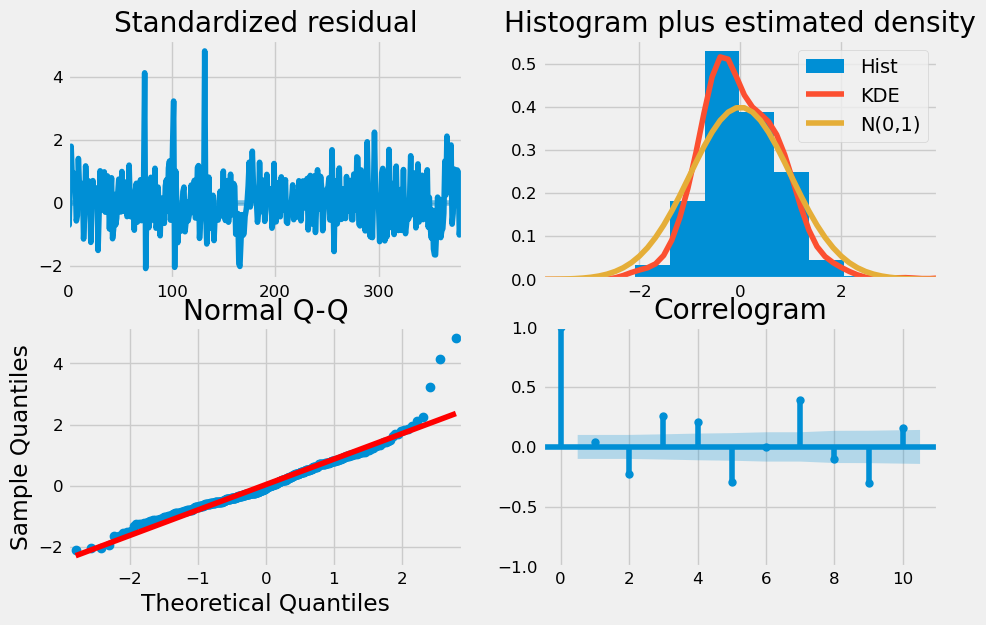

In [42]:
# Modelin diagnostik qrafikləri çıxarılır
model.plot_diagnostics(figsize=(10, 6.5))  

# Qrafikləri ekranda göstərir
plt.show() 

### Metrcis

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



# Əsl dəyərləri götürmək (məsələn, df-də son 30 gün)
y_true = df_pmdar['count'][-30:]  # Burada 'value' əsl dəyərləri göstərən sütundur
# 30 günlük proqnoz verin
y_pred = forecast_pmdar['forecast']


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.7338151980240568
Mean Absolute Error (MAE): 845.9900149994397
Mean Absolute Percentage Error (MAPE): 0.439606068221071
Mean Squared Error (MSE): 967798.268782283
Root Mean Squared Error (RMSE): 983.7673855044611


## Time Series Modeling with Prophet

In [44]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [45]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### Creat Model Prophet

In [46]:
from prophet import Prophet

model = Prophet(interval_width=0.95)
model.fit(df_prpht)

22:34:54 - cmdstanpy - INFO - Chain [1] start processing
22:34:55 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [47]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2468.748604  2165.670792  1786.235930  3137.276757
1   2015-01-02  2153.048510  2168.356510  1443.455948  2876.148466
2   2015-01-03  1321.366604  2171.042228   616.075717  1999.261277
3   2015-01-04  1462.981441  2173.727946   744.720815  2174.788617
4   2015-01-05  2479.064416  2176.413664  1782.101667  3178.140308
..         ...          ...          ...          ...          ...
409 2016-02-15  2966.934088  2664.283336  2254.347418  3697.017016
410 2016-02-16  3205.477934  2665.960694  2537.495366  3907.681454
411 2016-02-17  3098.122378  2667.638052  2402.759078  3863.580989
412 2016-02-18  2972.393222  2669.315411  2201.627948  3664.420924
413 2016-02-19  2655.684769  2670.992769  1887.443750  3355.259413

[414 rows x 5 columns]

In [48]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
384 2016-01-21  2925.427192  2622.349380  2188.227616  3686.320075
385 2016-01-22  2608.718739  2624.026739  1889.929236  3276.413212
386 2016-01-23  1776.028473  2625.704097  1064.972056  2458.304102
387 2016-01-24  1916.634950  2627.381455  1245.610455  2601.023587
388 2016-01-25  2931.709565  2629.058813  2192.694370  3682.131035

### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

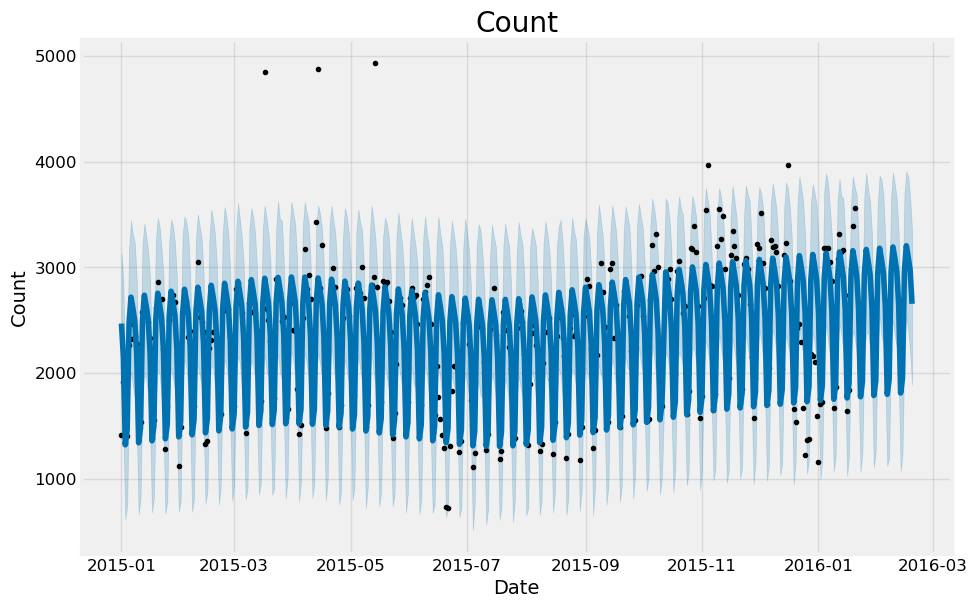

In [49]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


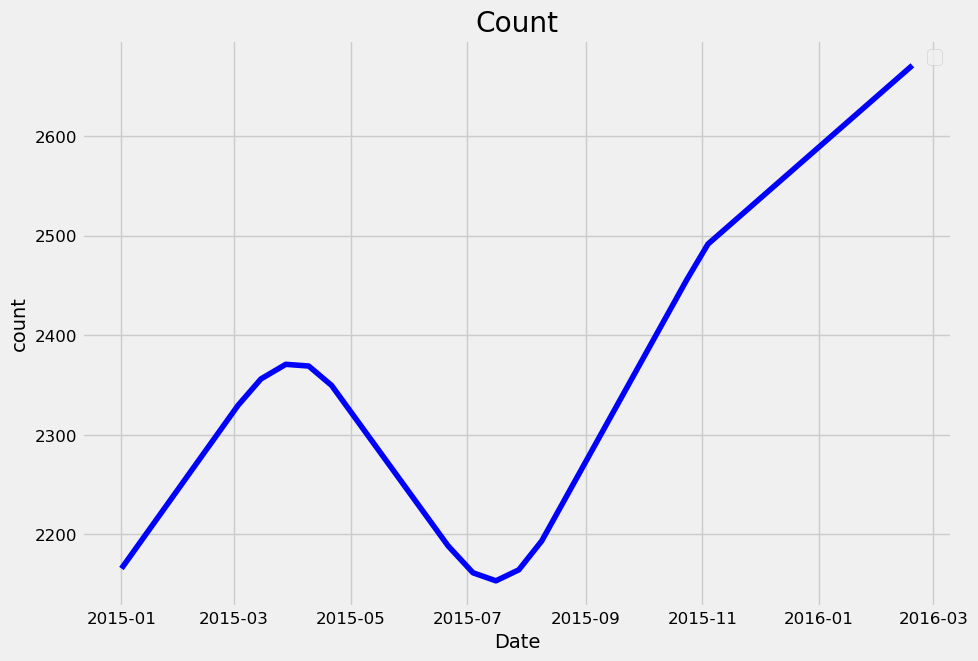

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

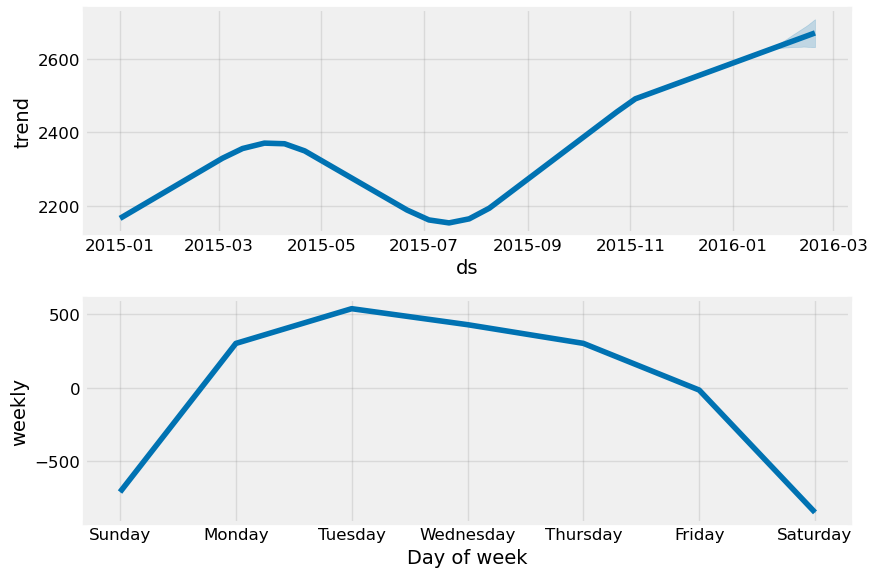

In [51]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

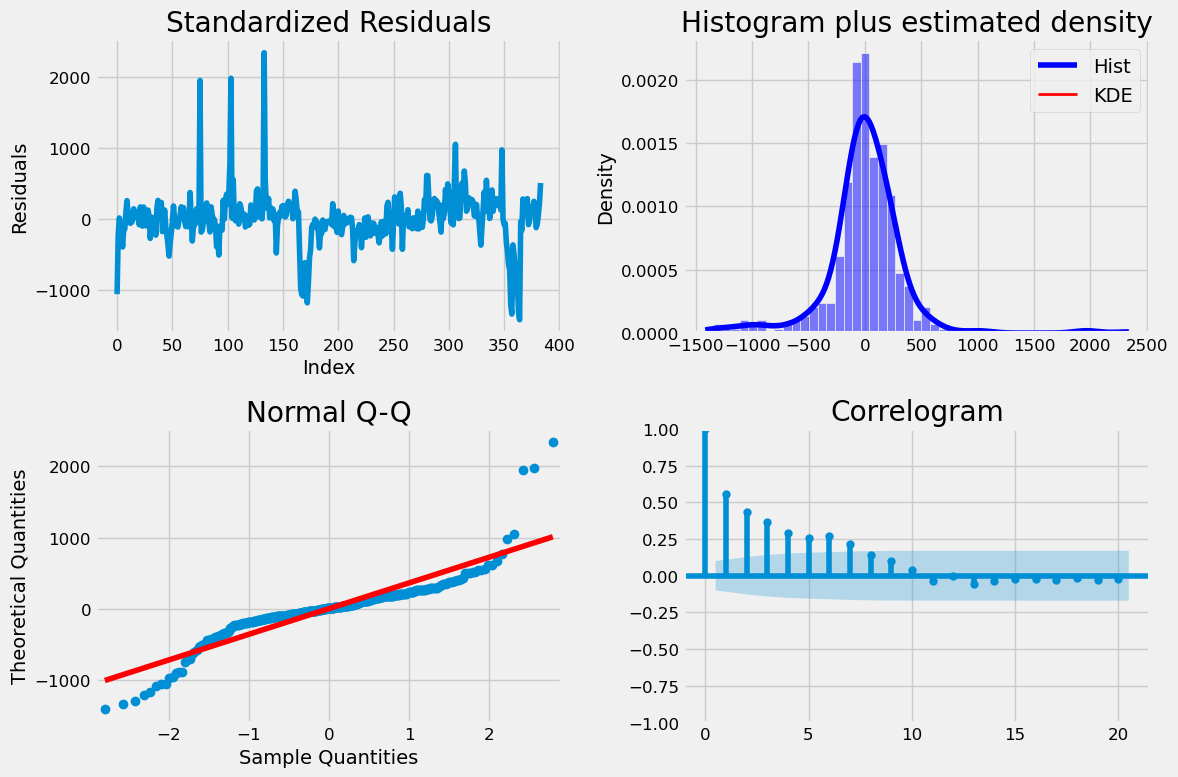

In [52]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.6986658318601799
Mean Absolute Error (MAE): 220.1048880641873
Mean Absolute Percentage Error (MAPE): 0.10306065864494394
Mean Squared Error (MSE): 130594.09716625644
Root Mean Squared Error (RMSE): 361.3780529670506


### Difference show with Real and Pred

In [54]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2468.748604 -1054.748604
1   2015-01-02  1920.0  2153.048510  -233.048510
2   2015-01-03  1338.0  1321.366604    16.633396
3   2015-01-04  1404.0  1462.981441   -58.981441
4   2015-01-05  2264.0  2479.064416  -215.064416
..         ...     ...          ...          ...
379 2016-01-16  1644.0  1764.286966  -120.286966
380 2016-01-17  1836.0  1904.893442   -68.893442
381 2016-01-18  2983.0  2919.968057    63.031943
382 2016-01-19  3389.0  3158.511904   230.488096
383 2016-01-20  3559.0  3051.156348   507.843652

[384 rows x 4 columns]

### Time Series Modeling with Prophet vs ParameterGrid

In [55]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [56]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### ParameterGrid

In [57]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
            "seasonality_mode" : ['multiplicative', 'additive']
            }

parameter_grid = ParameterGrid(parameters)

In [58]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    model = Prophet(
                    changepoint_prior_scale=p['changepoint_prior_scale'], 
                    n_changepoints=p['n_changepoints'],
                    holidays_prior_scale=p['holidays_prior_scale'], 
                    seasonality_mode=p['seasonality_mode'], 
                    interval_width=0.95
                    )
    
    # Modeli öyrətmək
    model.fit(df_prpht)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(periods=300, freq='D')
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = df_prpht
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)

Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


22:35:09 - cmdstanpy - INFO - Chain [1] start processing
22:35:10 - cmdstanpy - INFO - Chain [1] done processing
22:35:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:10 - cmdstanpy - INFO - Chain [1] start processing
22:35:10 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02958566284879588
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


22:35:12 - cmdstanpy - INFO - Chain [1] start processing
22:35:12 - cmdstanpy - INFO - Chain [1] done processing
22:35:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:12 - cmdstanpy - INFO - Chain [1] start processing
22:35:12 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02960164206395634
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


22:35:14 - cmdstanpy - INFO - Chain [1] start processing
22:35:14 - cmdstanpy - INFO - Chain [1] done processing
22:35:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:14 - cmdstanpy - INFO - Chain [1] start processing
22:35:14 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.023141363833519234
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


22:35:15 - cmdstanpy - INFO - Chain [1] start processing
22:35:16 - cmdstanpy - INFO - Chain [1] done processing
22:35:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:16 - cmdstanpy - INFO - Chain [1] start processing
22:35:16 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022455058715191222
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


22:35:17 - cmdstanpy - INFO - Chain [1] start processing
22:35:17 - cmdstanpy - INFO - Chain [1] done processing
22:35:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:17 - cmdstanpy - INFO - Chain [1] start processing
22:35:18 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02958566284879588
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


22:35:19 - cmdstanpy - INFO - Chain [1] start processing
22:35:19 - cmdstanpy - INFO - Chain [1] done processing
22:35:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:19 - cmdstanpy - INFO - Chain [1] start processing
22:35:19 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02960164206395634
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


22:35:20 - cmdstanpy - INFO - Chain [1] start processing
22:35:20 - cmdstanpy - INFO - Chain [1] done processing
22:35:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:20 - cmdstanpy - INFO - Chain [1] start processing
22:35:21 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.023141363833519234
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


22:35:22 - cmdstanpy - INFO - Chain [1] start processing
22:35:22 - cmdstanpy - INFO - Chain [1] done processing
22:35:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:35:22 - cmdstanpy - INFO - Chain [1] start processing
22:35:23 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022455058715191222
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


22:35:24 - cmdstanpy - INFO - Chain [1] start processing
22:35:24 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029586201253204224
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


22:35:25 - cmdstanpy - INFO - Chain [1] start processing
22:35:25 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029587500439381863
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022092315948247246
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


22:35:28 - cmdstanpy - INFO - Chain [1] start processing
22:35:28 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021152196483307965
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


22:35:29 - cmdstanpy - INFO - Chain [1] start processing
22:35:30 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029586201253204224
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


22:35:31 - cmdstanpy - INFO - Chain [1] start processing
22:35:31 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029587500439381863
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


22:35:32 - cmdstanpy - INFO - Chain [1] start processing
22:35:32 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022092315948247246
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


22:35:33 - cmdstanpy - INFO - Chain [1] start processing
22:35:33 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021152196483307965
[[0.02958566284879588, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.02960164206395634, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.023141363833519234, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}], [0.022455058715191222, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}], [0.02958566284879588, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.02960164206395634, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.023141363833519234, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_

In [59]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

MPE                                                  P
0   0.029586  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   0.029602  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   0.023141  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   0.022455  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   0.029586  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   0.029602  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   0.023141  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   0.022455  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   0.029586  {'changepoint_prior_scale': 0.2, 'holidays_pri...
9   0.029588  {'changepoint_prior_scale': 0.2, 'holidays_pri...
10  0.022092  {'changepoint_prior_scale': 0.2, 'holidays_pri...
11  0.021152  {'changepoint_prior_scale': 0.2, 'holidays_pri...
12  0.029586  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  0.029588  {'changepoint_prior_scale': 0.2, 'holidays_pri...
14  0.022092  {'changepoint_prior_scale': 0.2, 'holidays_pri...
15  0.021152  {'changepoint_prior_scale': 0.2, 'holidays_pri...

In [60]:
parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

MPE                                                  P
11  0.021152  {'changepoint_prior_scale': 0.2, 'holidays_pri...
15  0.021152  {'changepoint_prior_scale': 0.2, 'holidays_pri...
10  0.022092  {'changepoint_prior_scale': 0.2, 'holidays_pri...
14  0.022092  {'changepoint_prior_scale': 0.2, 'holidays_pri...
3   0.022455  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   0.022455  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   0.023141  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   0.023141  {'changepoint_prior_scale': 0.1, 'holidays_pri...
0   0.029586  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   0.029586  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   0.029586  {'changepoint_prior_scale': 0.2, 'holidays_pri...
12  0.029586  {'changepoint_prior_scale': 0.2, 'holidays_pri...
9   0.029588  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  0.029588  {'changepoint_prior_scale': 0.2, 'holidays_pri...
1   0.029602  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   0.029602  {'changepoint_prior_scale': 0.1, 'holidays_pri...

In [61]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.021152196483307965
Parameters:  {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


### Creat Model Prophet with Best Parameters

In [62]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 5,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_prpht)

22:35:35 - cmdstanpy - INFO - Chain [1] start processing
22:35:35 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [63]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2417.507590  2115.724428  1777.114005  3073.069167
1   2015-01-02  2103.006046  2119.201796  1442.853065  2766.131892
2   2015-01-03  1272.532686  2122.679164   627.642725  1906.659403
3   2015-01-04  1415.055030  2126.156533   743.676097  2080.803773
4   2015-01-05  2434.214834  2129.633901  1805.554471  3061.359701
..         ...          ...          ...          ...          ...
409 2016-02-15  2656.016593  2351.435660  1966.382166  3360.176773
410 2016-02-16  2888.096900  2348.228117  2204.022061  3574.276652
411 2016-02-17  2776.231428  2345.020574  2037.933349  3485.242698
412 2016-02-18  2643.596193  2341.813031  1989.257390  3335.140711
413 2016-02-19  2322.409738  2338.605488  1593.939967  3033.966200

[414 rows x 5 columns]

In [64]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
384 2016-01-21  2733.407394  2431.624232  2076.539028  3389.282845
385 2016-01-22  2412.220939  2428.416689  1757.860316  3017.950327
386 2016-01-23  1575.062668  2425.209146   838.809112  2253.470082
387 2016-01-24  1710.900101  2422.001604  1025.810958  2403.750869
388 2016-01-25  2723.374994  2418.794061  1985.928172  3351.293171

### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

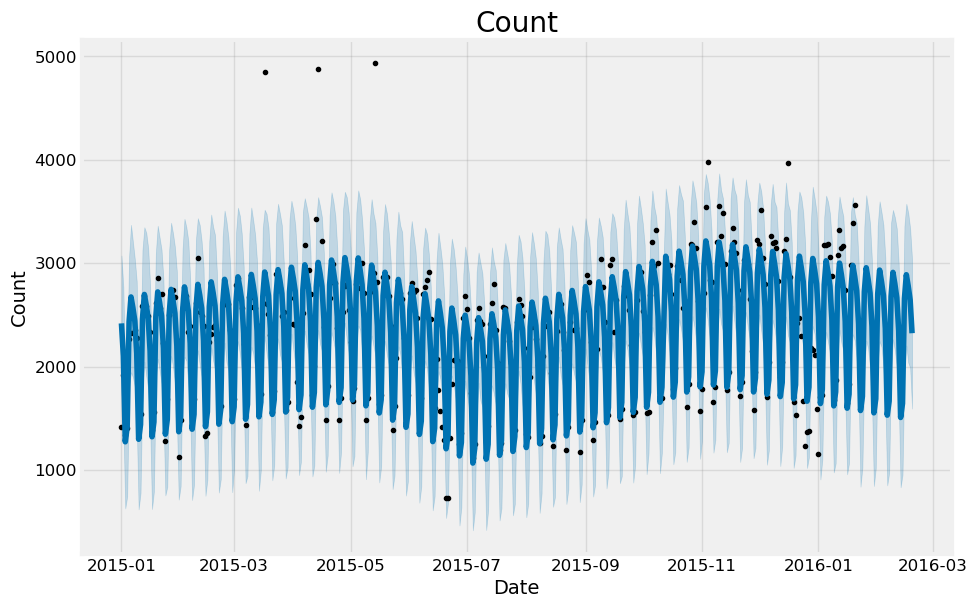

In [65]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


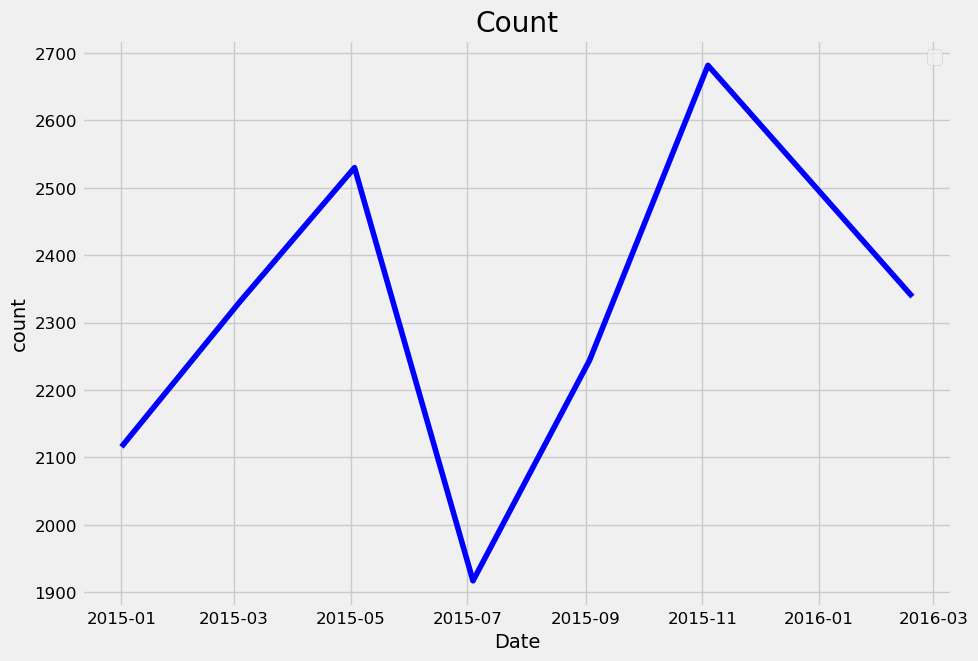

In [66]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

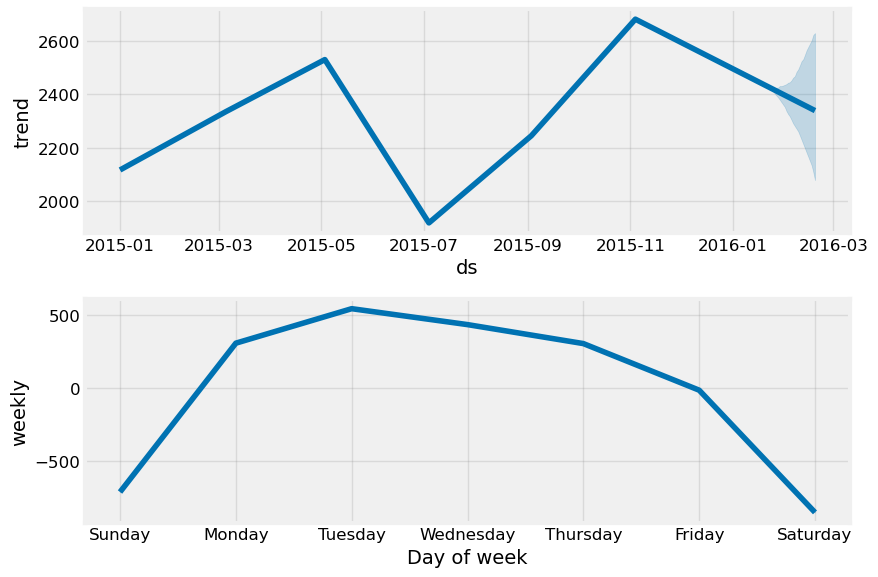

In [67]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

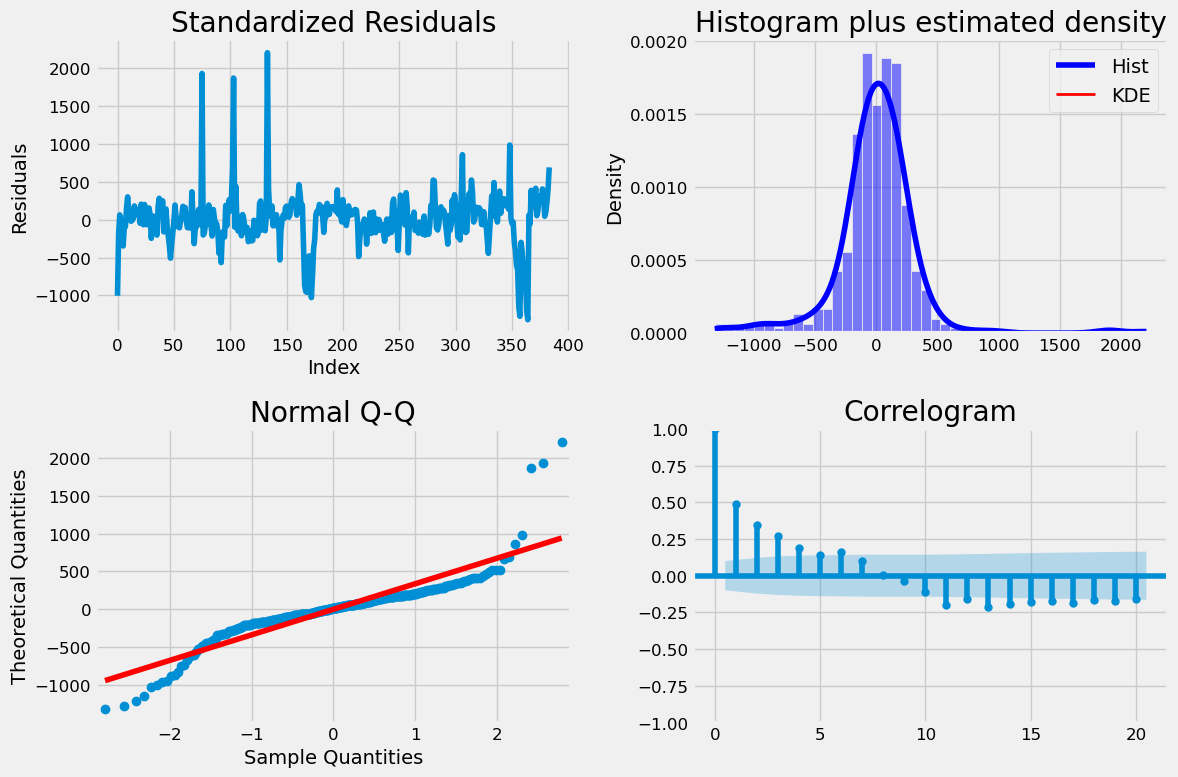

In [68]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7377273754918632
Mean Absolute Error (MAE): 210.8848503712671
Mean Absolute Percentage Error (MAPE): 0.09770470812387712
Mean Squared Error (MSE): 113665.3596918754
Root Mean Squared Error (RMSE): 337.142936589031


### Difference show with Real and Pred

In [70]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2417.507590 -1003.507590
1   2015-01-02  1920.0  2103.006046  -183.006046
2   2015-01-03  1338.0  1272.532686    65.467314
3   2015-01-04  1404.0  1415.055030   -11.055030
4   2015-01-05  2264.0  2434.214834  -170.214834
..         ...     ...          ...          ...
379 2016-01-16  1644.0  1597.515468    46.484532
380 2016-01-17  1836.0  1733.352901   102.647099
381 2016-01-18  2983.0  2745.827794   237.172206
382 2016-01-19  3389.0  2977.908101   411.091899
383 2016-01-20  3559.0  2866.042629   692.957371

[384 rows x 4 columns]

## Time Series Modeling with Prophet vs BayesianOptimization

In [71]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [72]:
df_byopt = copy.deepcopy(df)
df_byopt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_byopt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### BayesianOptimization

In [73]:
# !pip install bayesian-optimization 

In [74]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from bayes_opt import BayesianOptimization

# Modelin optimizasiyası üçün funksiya təyin edir
def optimization_function(changepoint_prior_scale, n_changepoints, holidays_prior_scale, seasonality_mode):
    
    # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
    if seasonality_mode == 0:
        seasonality_mode_str = 'additive'
    else:
        seasonality_mode_str = 'multiplicative'
    
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale, 
                    n_changepoints=int(n_changepoints),
                    holidays_prior_scale=holidays_prior_scale,
                    seasonality_mode=seasonality_mode_str)  # Prophet mdelini qurur
    
    model.fit(df_byopt)  # Məlumatı modelə uyğunlaşdırır
    
    # Modeli cross-validation metodundan keçirir
    cross_val = cross_validation(model, horizon='30 days', parallel='processes')
    
    # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
    perf_m = performance_metrics(cross_val, rolling_window=1)

    # RMSE dəyərini qaytarır
    rmse = (perf_m['rmse'].values[0])
    
    return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# Optimizasiya parametrlərini təyin edin
parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
#             "seasonality_mode" : ['multiplicative', 'additive']
            "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
            }

# BayesianOptimization obyektini yaradın
optimizer = BayesianOptimization(
    f=optimization_function,  # Optimizasiya ediləcək funksiya
    pbounds=parameters,  # Parametrlərin aralığı
    random_state=42  # Təsadüfi vəziyyət
)

# Optimizasiyanı yerinə yetirin
optimizer.maximize(
    init_points=5,  # Başlanğıc nöqtələrinin sayı
    n_iter=20,  # İterasiya sayısı
)

# Nəticələri çap edin
print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir

|   iter    |  target   | change... | holida... | n_chan... | season... |
-------------------------------------------------------------------------


22:35:51 - cmdstanpy - INFO - Chain [1] start processing
22:35:51 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -515.9    | 0.1375    | 0.1951    | 3.928     | 0.5987    |


22:36:01 - cmdstanpy - INFO - Chain [1] start processing
22:36:01 - cmdstanpy - INFO - Chain [1] done processing
22:36:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:36:01 - cmdstanpy - INFO - Chain [1] start processing
22:36:01 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -551.8    | 0.1156    | 0.1156    | 1.232     | 0.8662    |


22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
22:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -558.8    | 0.1601    | 0.1708    | 1.082     | 0.9699    |


22:36:14 - cmdstanpy - INFO - Chain [1] start processing
22:36:14 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -561.7    | 0.1832    | 0.1212    | 1.727     | 0.1834    |


22:36:20 - cmdstanpy - INFO - Chain [1] start processing
22:36:20 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -544.8    | 0.1304    | 0.1525    | 2.728     | 0.2912    |


22:36:30 - cmdstanpy - INFO - Chain [1] start processing
22:36:30 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -514.4    | 0.1       | 0.1758    | 3.925     | 0.1758    |


22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing
22:36:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:43 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -516.9    | 0.1       | 0.177     | 4.712     | 0.3079    |


22:36:53 - cmdstanpy - INFO - Chain [1] start processing
22:36:53 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -518.5    | 0.2       | 0.1       | 5.0       | 1.0       |


22:37:06 - cmdstanpy - INFO - Chain [1] start processing
22:37:06 - cmdstanpy - INFO - Chain [1] done processing
22:37:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:37:06 - cmdstanpy - INFO - Chain [1] start processing
22:37:06 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -516.9    | 0.1       | 0.1       | 4.374     | 1.0       |


22:37:15 - cmdstanpy - INFO - Chain [1] start processing
22:37:15 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -514.4    | 0.1       | 0.1       | 3.376     | 1.0       |


22:37:22 - cmdstanpy - INFO - Chain [1] start processing
22:37:23 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -513.0    | 0.2       | 0.1       | 5.0       | 0.0       |


22:37:33 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing
22:37:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:37:33 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -508.0    | 0.2       | 0.1       | 4.368     | 0.0       |


22:37:45 - cmdstanpy - INFO - Chain [1] start processing
22:37:46 - cmdstanpy - INFO - Chain [1] done processing
22:37:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:37:46 - cmdstanpy - INFO - Chain [1] start processing
22:37:47 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -513.2    | 0.1       | 0.2       | 4.445     | 0.0       |


22:37:59 - cmdstanpy - INFO - Chain [1] start processing
22:37:59 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -518.3    | 0.2       | 0.1       | 3.799     | 1.0       |


22:38:07 - cmdstanpy - INFO - Chain [1] start processing
22:38:07 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -539.8    | 0.1       | 0.1       | 2.694     | 1.0       |


22:38:14 - cmdstanpy - INFO - Chain [1] start processing
22:38:14 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -513.0    | 0.2       | 0.1       | 3.548     | 0.0       |


22:38:21 - cmdstanpy - INFO - Chain [1] start processing
22:38:21 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -518.3    | 0.2       | 0.1       | 3.488     | 0.5099    |


22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -508.0    | 0.2       | 0.1       | 4.036     | 0.0       |


22:38:37 - cmdstanpy - INFO - Chain [1] start processing
22:38:37 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -513.3    | 0.2       | 0.1       | 4.273     | 0.3468    |


22:38:46 - cmdstanpy - INFO - Chain [1] start processing
22:38:46 - cmdstanpy - INFO - Chain [1] done processing
22:38:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:38:46 - cmdstanpy - INFO - Chain [1] start processing
22:38:47 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -508.0    | 0.2       | 0.2       | 4.171     | 0.0       |


22:38:56 - cmdstanpy - INFO - Chain [1] start processing
22:38:56 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -513.0    | 0.2       | 0.2       | 3.839     | 0.0       |


22:39:05 - cmdstanpy - INFO - Chain [1] start processing
22:39:05 - cmdstanpy - INFO - Chain [1] done processing
22:39:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:39:05 - cmdstanpy - INFO - Chain [1] start processing
22:39:06 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -513.2    | 0.1       | 0.1       | 4.187     | 0.0       |


22:39:17 - cmdstanpy - INFO - Chain [1] start processing
22:39:17 - cmdstanpy - INFO - Chain [1] done processing
22:39:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:39:17 - cmdstanpy - INFO - Chain [1] start processing
22:39:17 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -508.0    | 0.2       | 0.2       | 4.696     | 0.0       |


22:39:26 - cmdstanpy - INFO - Chain [1] start processing
22:39:26 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -518.5    | 0.2       | 0.2       | 5.0       | 0.4813    |


22:39:33 - cmdstanpy - INFO - Chain [1] start processing
22:39:33 - cmdstanpy - INFO - Chain [1] done processing
22:39:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:39:33 - cmdstanpy - INFO - Chain [1] start processing
22:39:34 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -508.0    | 0.2       | 0.1       | 4.647     | 0.0       |
{'target': -508.0127254137539, 'params': {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 4.367611133853523, 'seasonality_mode': 0.0}}


### Creat Model Prophet with Best Parameters

In [75]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 4,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_byopt)

22:39:44 - cmdstanpy - INFO - Chain [1] start processing
22:39:44 - cmdstanpy - INFO - Chain [1] done processing
22:39:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:39:44 - cmdstanpy - INFO - Chain [1] start processing
22:39:44 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [76]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_byopt = model.predict(future)
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

ds         yhat        trend   yhat_lower   yhat_upper
0   2015-01-01  2369.535505  2067.489468  1664.069988  3029.174973
1   2015-01-02  2056.653586  2072.728318  1329.850081  2703.532705
2   2015-01-03  1227.798426  2077.967168   551.349487  1927.696069
3   2015-01-04  1372.217056  2083.206018   649.962082  1995.486657
4   2015-01-05  2392.848065  2088.444868  1712.518009  3137.368941
..         ...          ...          ...          ...          ...
409 2016-02-15  2624.354458  2319.951261  1895.144743  3310.940871
410 2016-02-16  2855.883916  2316.109349  2165.084100  3591.599961
411 2016-02-17  2743.276072  2312.267437  2072.302384  3389.214809
412 2016-02-18  2610.471562  2308.425525  1862.535002  3241.367400
413 2016-02-19  2288.508880  2304.583612  1600.858513  2978.794911

[414 rows x 5 columns]

In [77]:
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

ds         yhat        trend   yhat_lower   yhat_upper
384 2016-01-21  2718.045105  2415.999068  2057.763192  3372.661103
385 2016-01-22  2396.082424  2412.157156  1737.339462  3058.403875
386 2016-01-23  1558.146502  2408.315244   915.927529  2255.287422
387 2016-01-24  1693.484369  2404.473331  1056.163468  2378.942427
388 2016-01-25  2705.034616  2400.631419  1936.541463  3354.925094

### Plotting Forecast

<Figure size 1800x600 with 0 Axes>

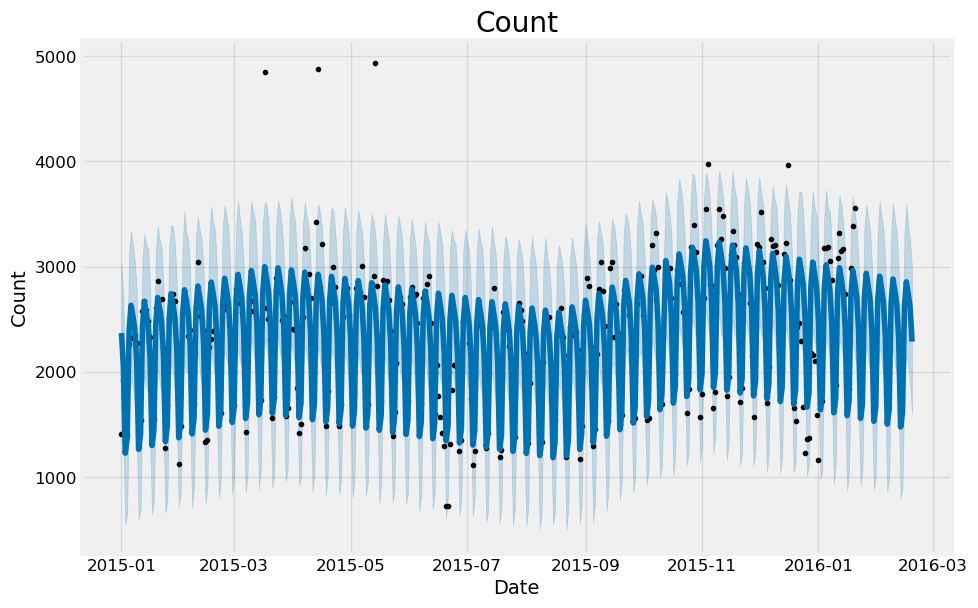

In [78]:
#plotting future forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_byopt, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


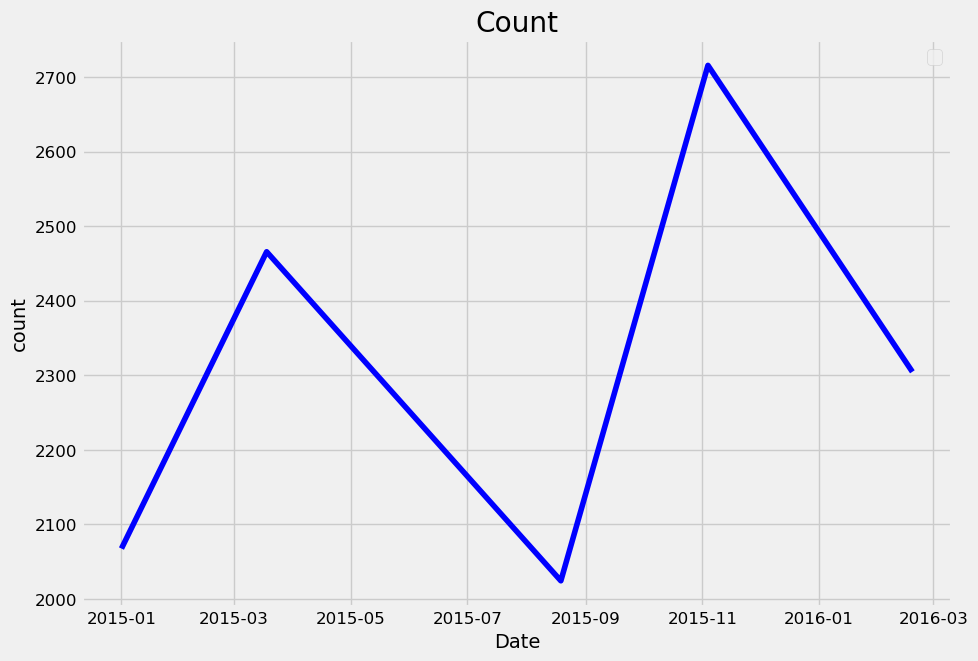

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_byopt['ds'], forecast_byopt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

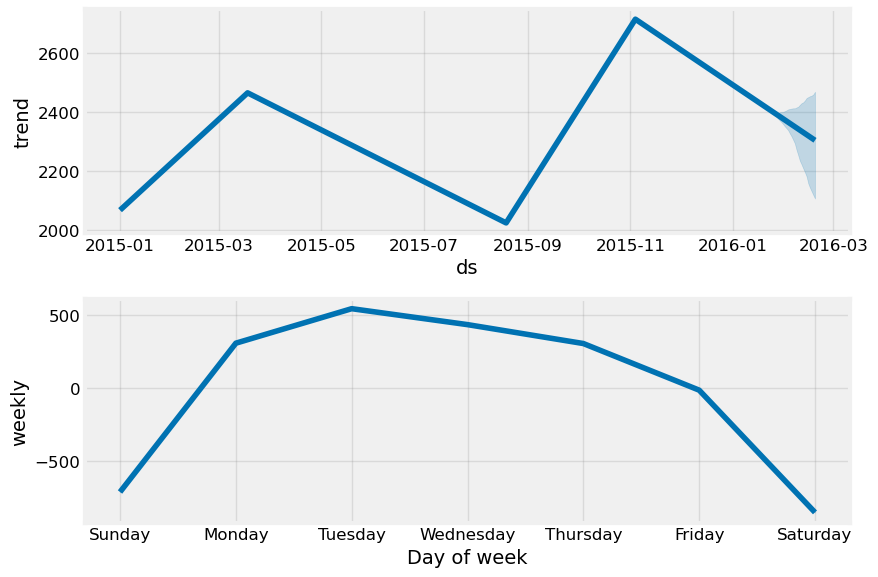

In [80]:
model.plot_components(forecast_byopt)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

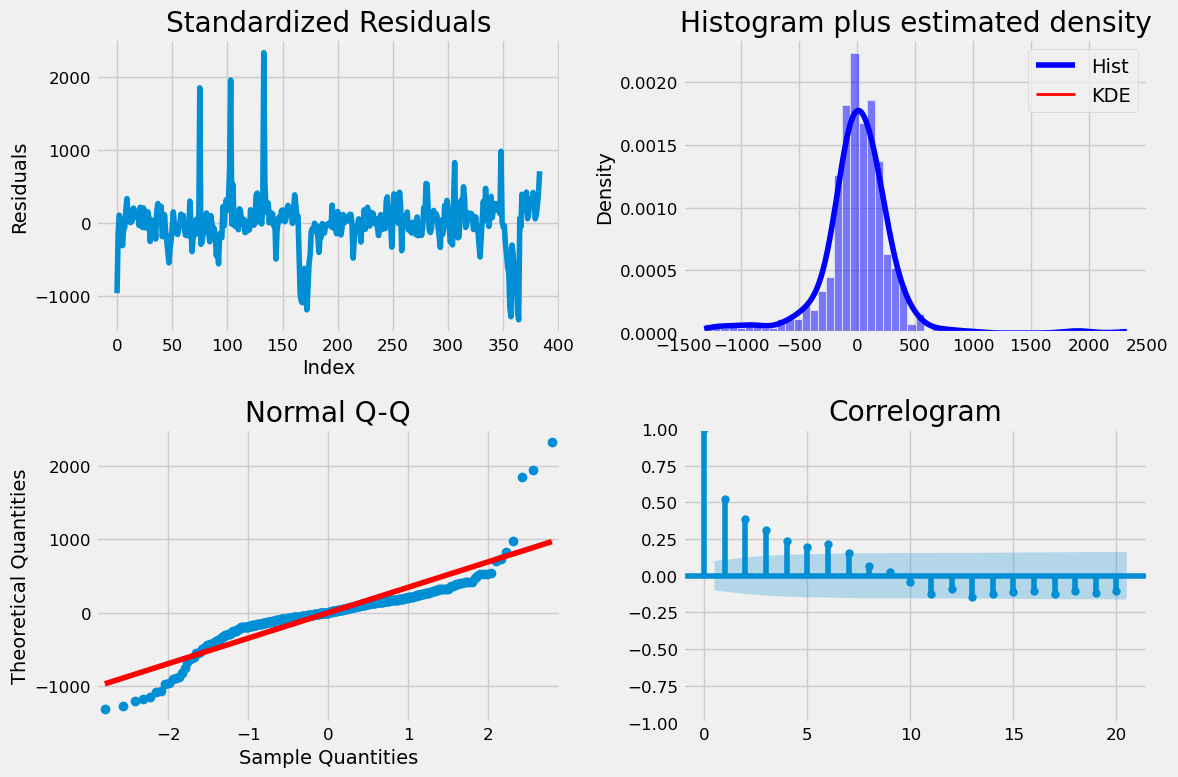

In [81]:
# Qalıqları hesablayın
residuals = df_byopt['y'] - forecast_byopt['yhat'][:len(df_byopt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_byopt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_byopt['yhat'][:len(df_byopt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7216280304470821
Mean Absolute Error (MAE): 211.3910901105165
Mean Absolute Percentage Error (MAPE): 0.09888856258816049
Mean Squared Error (MSE): 120642.59511150983
Root Mean Squared Error (RMSE): 347.33642928939923


### Difference show with Real and Pred

In [83]:
pd.DataFrame({'date': df_byopt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst        diff
0   2015-01-01  1414.0  2369.535505 -955.535505
1   2015-01-02  1920.0  2056.653586 -136.653586
2   2015-01-03  1338.0  1227.798426  110.201574
3   2015-01-04  1404.0  1372.217056   31.782944
4   2015-01-05  2264.0  2392.848065 -128.848065
..         ...     ...          ...         ...
379 2016-01-16  1644.0  1585.039888   58.960112
380 2016-01-17  1836.0  1720.377755  115.622245
381 2016-01-18  2983.0  2731.928002  251.071998
382 2016-01-19  3389.0  2963.457459  425.542541
383 2016-01-20  3559.0  2850.849616  708.150384

[384 rows x 4 columns]

## Time-series modeling with NeuralProphet

In [84]:
# !pip install neuralprophet

In [85]:
# !pip install plotly-resampler

In [86]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [87]:
df_neupt = copy.deepcopy(df)
df_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### Find Best Learning Rate

In [88]:
# !pip install optuna

In [89]:
from neuralprophet import NeuralProphet
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(df_neupt, learning_rate=lr, epochs=40, freq="D")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)

[I 2024-10-23 22:40:25,877] A new study created in memory with name: no-name-43606874-f1fb-4fd7-8e49-836a4b365713
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Current trial learning rate: 0.5188797638409964


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:41:03,144] Trial 0 finished with value: 0.022253746166825294 and parameters: {'learning_rate': 0.5188797638409964}. Best is trial 0 with value: 0.022253746166825294.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Current trial learning rate: 0.2858836838687587


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:41:34,363] Trial 1 finished with value: 0.02212645299732685 and parameters: {'learning_rate': 0.2858836838687587}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.06122594676977358


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:42:03,695] Trial 2 finished with value: 0.022235726937651634 and parameters: {'learning_rate': 0.06122594676977358}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.007402010389916355


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:42:33,792] Trial 3 finished with value: 0.025844024494290352 and parameters: {'learning_rate': 0.007402010389916355}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.008705090341725756


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:43:05,405] Trial 4 finished with value: 0.03120396099984646 and parameters: {'learning_rate': 0.008705090341725756}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.02645590180974106


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:43:35,625] Trial 5 finished with value: 0.02287442795932293 and parameters: {'learning_rate': 0.02645590180974106}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.7824754206661705


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:44:07,497] Trial 6 finished with value: 0.022549333050847054 and parameters: {'learning_rate': 0.7824754206661705}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.046450684961072214


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:44:41,219] Trial 7 finished with value: 0.022220665588974953 and parameters: {'learning_rate': 0.046450684961072214}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.057767648128663224


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:45:12,922] Trial 8 finished with value: 0.022418277338147163 and parameters: {'learning_rate': 0.057767648128663224}. Best is trial 1 with value: 0.02212645299732685.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0026735826201330164


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:45:47,133] Trial 9 finished with value: 0.13245685398578644 and parameters: {'learning_rate': 0.0026735826201330164}. Best is trial 1 with value: 0.02212645299732685.


Best learning rate:  {'learning_rate': 0.2858836838687587}


### Craeating NeuralProphet Model vs Best Learning Rate

In [91]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

model.set_plotting_backend("plotly-static")

metrics = model.fit(df_neupt,
    learning_rate=0.2858836838687587,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [92]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_neupt, periods=30, n_historic_predictions=len(df_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [93]:
forecast_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2383.395996  1440.664307  3226.048340  2077.197998   
1   2015-01-02  1920.0  2103.876221  1123.078857  2649.162109  2081.224121   
2   2015-01-03  1338.0  1226.766113   734.810059  1624.843994  2085.250000   
3   2015-01-04  1404.0  1359.282959   854.454712  1709.115723  2089.275879   
4   2015-01-05  2264.0  2401.154053  1703.035156  2899.744629  2093.301758   
..         ...     ...          ...          ...          ...          ...   
409 2016-02-15     NaN  2982.847656  1933.811646  3430.079102  2675.121094   
410 2016-02-16     NaN  3188.121826  2124.110596  4436.149414  2676.474121   
411 2016-02-17     NaN  3117.926514  1983.709351  3953.529541  2677.827637   
412 2016-02-18     NaN  2985.502197  1697.946777  3779.115723  2679.181152   
413 2016-02-19     NaN  2704.052246  1368.046387  3202.652588  2680.534668   

     season_weekly  
0       306.198059  
1        22.652260  
2      -858.483826  
3      -729.992920  
4       307.852081  
..             ...  
409     307.726562  
410     511.647675  
411     440.098907  
412     306.321259  
413      23.517529  

[414 rows x 7 columns]

In [94]:
forecast_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  2947.617188  1793.292969  3692.641113  2641.286133   
385 2016-01-22 NaN  2665.348389  1462.871826  3115.305664  2642.639648   
386 2016-01-23 NaN  1784.837402  1061.746216  2089.970703  2643.993164   
387 2016-01-24 NaN  1915.428223  1169.227051  2174.650879  2645.346436   
388 2016-01-25 NaN  2954.498535  2005.273193  3365.064697  2646.699707   

     season_weekly  
384     306.330994  
385      22.708687  
386    -859.155518  
387    -729.918213  
388     307.798737

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

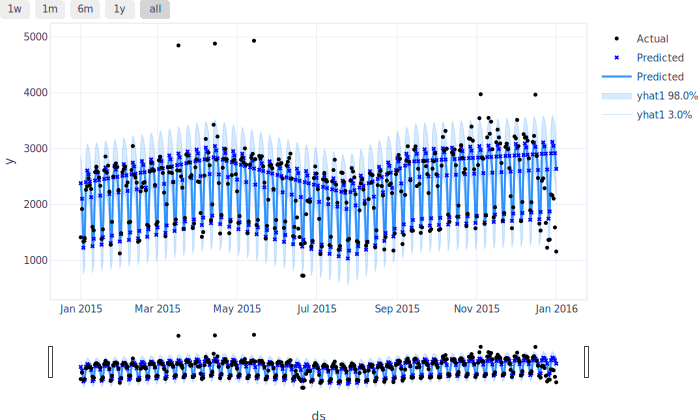

In [95]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


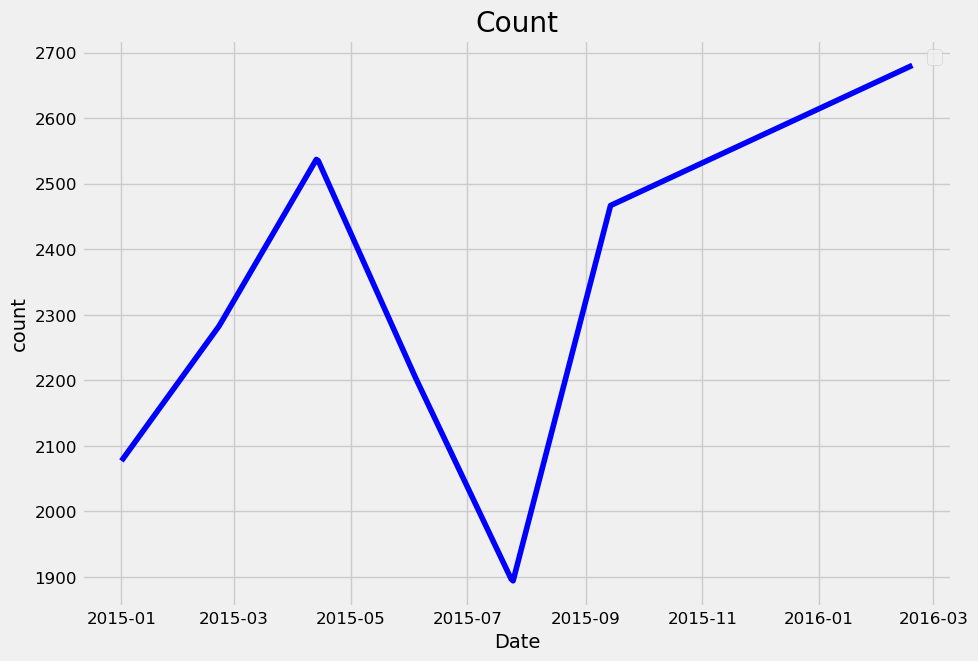

In [96]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_neupt['ds'], forecast_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

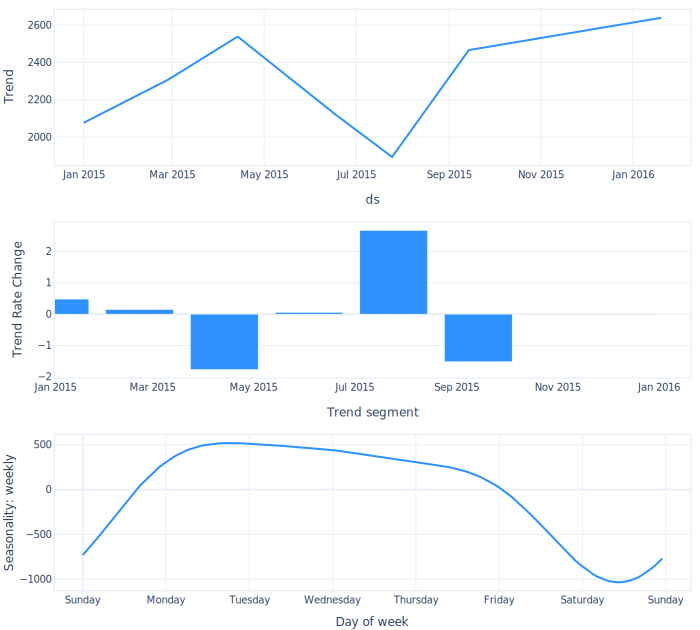

In [97]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır

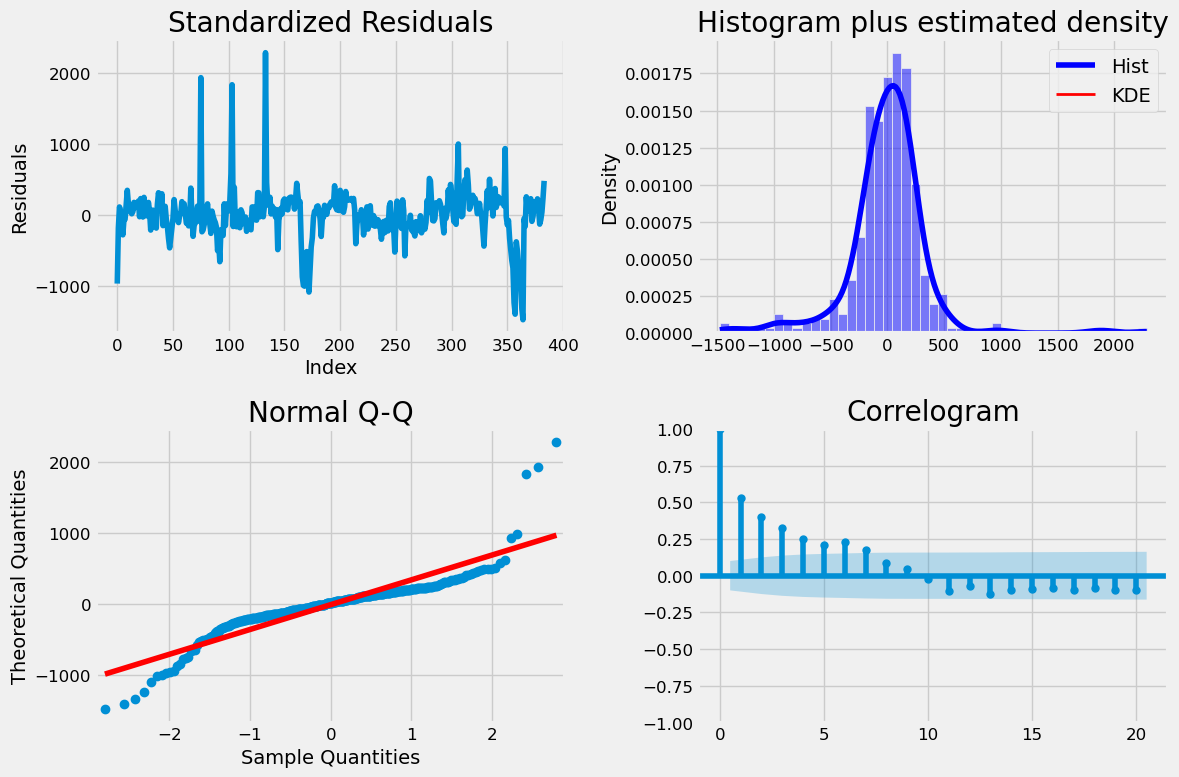

In [98]:
# Qalıqları hesablayın
residuals = df_neupt['y'] - forecast_neupt['yhat1'][:len(df_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [99]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss         MAE        RMSE      Loss  RegLoss  epoch
0     0.179344       0.0  694.930481  872.570740  0.179344      0.0      0
1     0.087483       0.0  412.858643  515.663330  0.087483      0.0      1
2     0.056662       0.0  293.905487  405.381256  0.056662      0.0      2
3     0.044312       0.0  269.840607  382.000580  0.044312      0.0      3
4     0.046361       0.0  284.898285  395.794708  0.046361      0.0      4
5     0.053236       0.0  303.444305  418.253998  0.053236      0.0      5
6     0.076449       0.0  360.792267  477.305695  0.076449      0.0      6
7     0.090997       0.0  403.912689  530.158569  0.090997      0.0      7
8     0.083021       0.0  360.846222  475.672577  0.083021      0.0      8
9     0.108489       0.0  442.756073  545.745667  0.108489      0.0      9
10    0.126740       0.0  464.339111  583.099976  0.126740      0.0     10
11    0.116033       0.0  422.175659  548.888855  0.116033      0.0     11
12    0.144310       0.0 

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [100]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 218.9226837158203
Final RMSE: 319.0180358886719


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [101]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_neupt['yhat1'][:len(df_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.716831506490931
Mean Absolute Error (MAE): 218.48589186257541
Mean Absolute Percentage Error (MAPE): 0.10313758109407067
Mean Squared Error (MSE): 122721.34283353791
Root Mean Squared Error (RMSE): 350.3160613410951


### Difference show with Real and Pred

In [102]:
pd.DataFrame({'date': df_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst        diff
0   2015-01-01  1414.0  2383.395996 -969.395996
1   2015-01-02  1920.0  2103.876221 -183.876221
2   2015-01-03  1338.0  1226.766113  111.233887
3   2015-01-04  1404.0  1359.282959   44.717041
4   2015-01-05  2264.0  2401.154053 -137.154053
..         ...     ...          ...         ...
379 2016-01-16  1644.0  1775.522461 -131.522461
380 2016-01-17  1836.0  1905.792725  -69.792725
381 2016-01-18  2983.0  2945.795166   37.204834
382 2016-01-19  3389.0  3150.231201  238.768799
383 2016-01-20  3559.0  3080.040283  478.959717

[384 rows x 4 columns]

### Only Forecast Data

In [103]:
forecast_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  2947.617188  1793.292969  3692.641113  2641.286133   
385 2016-01-22 NaN  2665.348389  1462.871826  3115.305664  2642.639648   
386 2016-01-23 NaN  1784.837402  1061.746216  2089.970703  2643.993164   
387 2016-01-24 NaN  1915.428223  1169.227051  2174.650879  2645.346436   
388 2016-01-25 NaN  2954.498535  2005.273193  3365.064697  2646.699707   

     season_weekly  
384     306.330994  
385      22.708687  
386    -859.155518  
387    -729.918213  
388     307.798737

## Time-series modeling with NeuralProphet vs ParameterGrid

In [104]:
# !pip install neuralprophet

In [105]:
# !pip install plotly-resampler

In [106]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Selection Feature

In [107]:
df_pr_neupt = copy.deepcopy(df)
df_pr_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_pr_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### Find Best Learning Rate

In [108]:
# !pip install optuna

In [109]:
from neuralprophet import NeuralProphet
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(df_pr_neupt, learning_rate=lr, epochs=40, freq="D")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)

[I 2024-10-23 22:48:32,998] A new study created in memory with name: no-name-92e2ba46-9ff8-4ddf-bdf7-d629f2b57072


Current trial learning rate: 0.0027507088617351187


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:49:02,874] Trial 0 finished with value: 0.2000720500946045 and parameters: {'learning_rate': 0.0027507088617351187}. Best is trial 0 with value: 0.2000720500946045.


Current trial learning rate: 0.0028176852086884683


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:49:32,531] Trial 1 finished with value: 1.3033115863800049 and parameters: {'learning_rate': 0.0028176852086884683}. Best is trial 0 with value: 0.2000720500946045.


Current trial learning rate: 0.0057081976731710995


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:50:06,499] Trial 2 finished with value: 0.032170604914426804 and parameters: {'learning_rate': 0.0057081976731710995}. Best is trial 2 with value: 0.032170604914426804.


Current trial learning rate: 0.2860695020497939


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:50:37,967] Trial 3 finished with value: 0.022244224324822426 and parameters: {'learning_rate': 0.2860695020497939}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.0023447036413568718


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:51:08,413] Trial 4 finished with value: 0.031310729682445526 and parameters: {'learning_rate': 0.0023447036413568718}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.06762881332887896


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:51:48,517] Trial 5 finished with value: 0.022345399484038353 and parameters: {'learning_rate': 0.06762881332887896}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.015562486765451893


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:52:19,630] Trial 6 finished with value: 0.0243803933262825 and parameters: {'learning_rate': 0.015562486765451893}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.003796830402581199


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:52:49,653] Trial 7 finished with value: 0.03508267551660538 and parameters: {'learning_rate': 0.003796830402581199}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.05051807951407184


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:53:20,212] Trial 8 finished with value: 0.022383296862244606 and parameters: {'learning_rate': 0.05051807951407184}. Best is trial 3 with value: 0.022244224324822426.


Current trial learning rate: 0.004792179884736272


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 22:53:52,821] Trial 9 finished with value: 0.025699853897094727 and parameters: {'learning_rate': 0.004792179884736272}. Best is trial 3 with value: 0.022244224324822426.


Best learning rate:  {'learning_rate': 0.2860695020497939}


### ParameterGrid

In [110]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "n_changepoints": [5],  # Dəyişiklik nöqtələrinin sayı kiçik aralıqlarda dəyişir
            "changepoints_range": [0.8, 0.9],  # 80-90% aralığında dəyişiklik nöqtələrinin yerləşdirilməsi
            "trend_reg": [0, 0.2],  # Trend üçün cərimə, regulyarizasiya dəyərləri kiçik tutulur
            "seasonality_reg": [0, 0.2],  # Sezonsallıq üçün cərimə
            }

parameter_grid = ParameterGrid(parameters)

In [111]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    from neuralprophet import NeuralProphet, set_log_level

    # Disable logging messages unless there is an error
    set_log_level("ERROR")
    confidence_level = 0.95
    boundaries = round((1 - confidence_level) / 2, 2)
    # NeuralProphet only accepts quantiles value in between 0 and 1
    quantiles = [boundaries, confidence_level + boundaries]

    model = NeuralProphet(
        quantiles=quantiles,
        # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
        growth="linear",
        # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
        changepoints=None,
        # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
        n_changepoints=p["n_changepoints"],
        # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
        changepoints_range=p["changepoints_range"],
        # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
        trend_reg=p["trend_reg"],
        # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
        trend_reg_threshold=False,
        # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        yearly_seasonality="auto",
        # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        weekly_seasonality="auto",
        # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        daily_seasonality="auto",
        # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
        seasonality_mode="additive",
        # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
        seasonality_reg=p["seasonality_reg"],
        # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
        n_forecasts=1,
        # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
        n_lags=0,
        # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
        loss_func="Huber",
        # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
        normalize="auto",
        # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
        impute_missing=True
        # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
    #   num_hidden_layers=0,
        # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
    #   d_hidden=None,     
        # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
    #   ar_sparsity=None,  
    )

    model.set_plotting_backend("plotly-static")
    
    # Modeli öyrətmək
    metrics=model.fit(df_pr_neupt,
        learning_rate=0.2860695020497939,  # Öyrənmə sürətini manual təyin edirsiniz
        epochs=40,           
        freq="D",)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(df_pr_neupt, periods=30, n_historic_predictions=len(df_pr_neupt))
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat1']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = df_pr_neupt
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat1'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)

Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.02198504194492669
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.023800071550890502
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.023277049506740397
Testing parameters: {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.02285166458382636
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.014665154558827253
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.02218557851041616
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.015779141117370235
Testing parameters: {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

MPE: 0.027742670528438068
[[0.02198504194492669, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}], [0.023800071550890502, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}], [0.023277049506740397, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}], [0.02285166458382636, {'changepoints_range': 0.8, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}], [0.014665154558827253, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}], [0.02218557851041616, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0.2}], [0.015779141117370235, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0}], [0.027742670528438068, {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0.2, 'trend_reg': 0.2}]]


In [112]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

MPE                                                  P
0  0.021985  {'changepoints_range': 0.8, 'n_changepoints': ...
1  0.023800  {'changepoints_range': 0.8, 'n_changepoints': ...
2  0.023277  {'changepoints_range': 0.8, 'n_changepoints': ...
3  0.022852  {'changepoints_range': 0.8, 'n_changepoints': ...
4  0.014665  {'changepoints_range': 0.9, 'n_changepoints': ...
5  0.022186  {'changepoints_range': 0.9, 'n_changepoints': ...
6  0.015779  {'changepoints_range': 0.9, 'n_changepoints': ...
7  0.027743  {'changepoints_range': 0.9, 'n_changepoints': ...

In [113]:
parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

MPE                                                  P
4  0.014665  {'changepoints_range': 0.9, 'n_changepoints': ...
6  0.015779  {'changepoints_range': 0.9, 'n_changepoints': ...
0  0.021985  {'changepoints_range': 0.8, 'n_changepoints': ...
5  0.022186  {'changepoints_range': 0.9, 'n_changepoints': ...
3  0.022852  {'changepoints_range': 0.8, 'n_changepoints': ...
2  0.023277  {'changepoints_range': 0.8, 'n_changepoints': ...
1  0.023800  {'changepoints_range': 0.8, 'n_changepoints': ...
7  0.027743  {'changepoints_range': 0.9, 'n_changepoints': ...

In [114]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.014665154558827253
Parameters:  {'changepoints_range': 0.9, 'n_changepoints': 5, 'seasonality_reg': 0, 'trend_reg': 0}


### Creat Model NeuralProphet with Best Parameters

In [115]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.9,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)


model.set_plotting_backend("plotly-static")

metrics = model.fit(df_pr_neupt,
    learning_rate=0.2860695020497939,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [116]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_pr_neupt, periods=30, n_historic_predictions=len(df_pr_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_pr_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [117]:
forecast_pr_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2371.404297  1651.166260  3375.552734  2068.036133   
1   2015-01-02  1920.0  2077.841797  1359.955078  2682.268066  2072.205811   
2   2015-01-03  1338.0  1217.123657   903.208801  1698.240967  2076.375488   
3   2015-01-04  1404.0  1355.635742   993.665527  1844.943604  2080.545410   
4   2015-01-05  2264.0  2394.313965  1836.379272  3006.267822  2084.715088   
..         ...     ...          ...          ...          ...          ...   
409 2016-02-15     NaN  2774.799072  1546.771240  3130.536133  2465.337891   
410 2016-02-16     NaN  2964.943115  1802.980103  3993.790771  2463.738525   
411 2016-02-17     NaN  2926.423584  1689.951660  3718.139160  2462.139160   
412 2016-02-18     NaN  2764.077637  1354.316895  3527.439209  2460.539551   
413 2016-02-19     NaN  2465.453613  1049.953247  2827.145508  2458.940186   

     season_weekly  
0       303.367859  
1         5.636083  
2      -859.252014  
3      -724.909607  
4       309.598785  
..             ...  
409     309.461395  
410     501.204620  
411     464.284485  
412     303.537964  
413       6.513488  

[414 rows x 7 columns]

In [118]:
forecast_pr_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  2808.874023  1598.472412  3540.562500  2505.322754   
385 2016-01-22 NaN  2509.423584  1293.583252  2839.272949  2503.723145   
386 2016-01-23 NaN  1642.220215   823.060547  1846.908691  2502.123779   
387 2016-01-24 NaN  1775.695923   900.578613  1986.551514  2500.524414   
388 2016-01-25 NaN  2808.466797  1729.873047  3140.238281  2498.924805   

     season_weekly  
384     303.551422  
385       5.700272  
386    -859.903687  
387    -724.828552  
388     309.541901

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

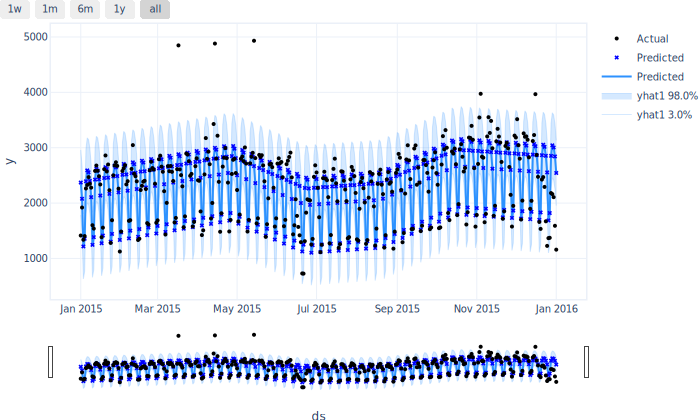

In [119]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_pr_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


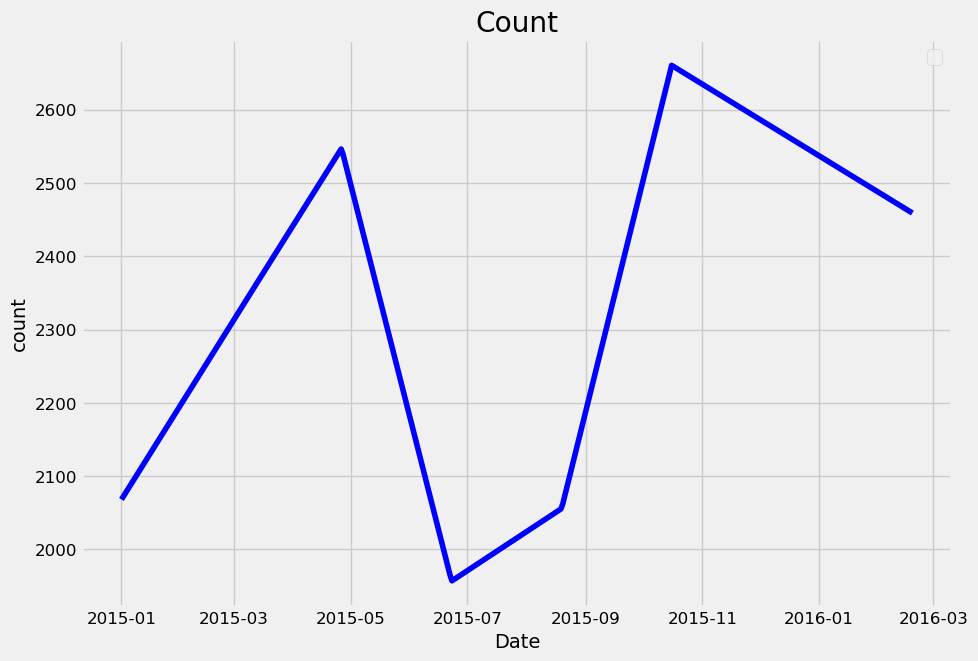

In [120]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_pr_neupt['ds'], forecast_pr_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

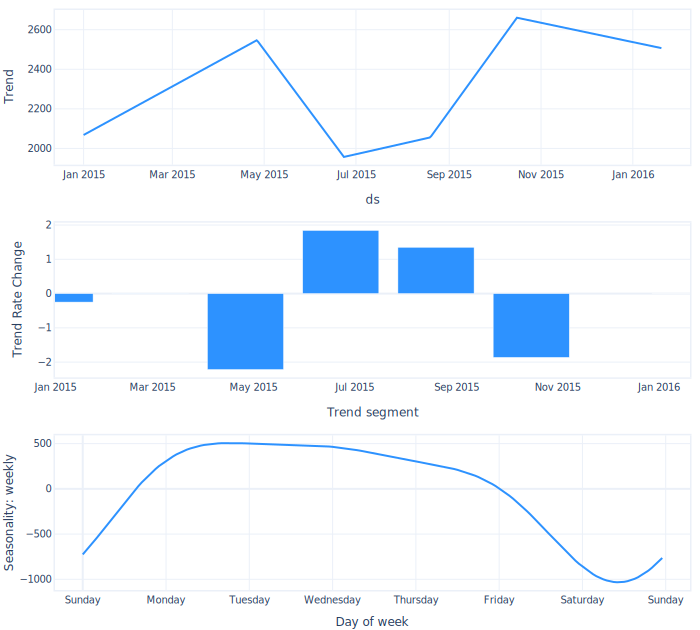

In [121]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır

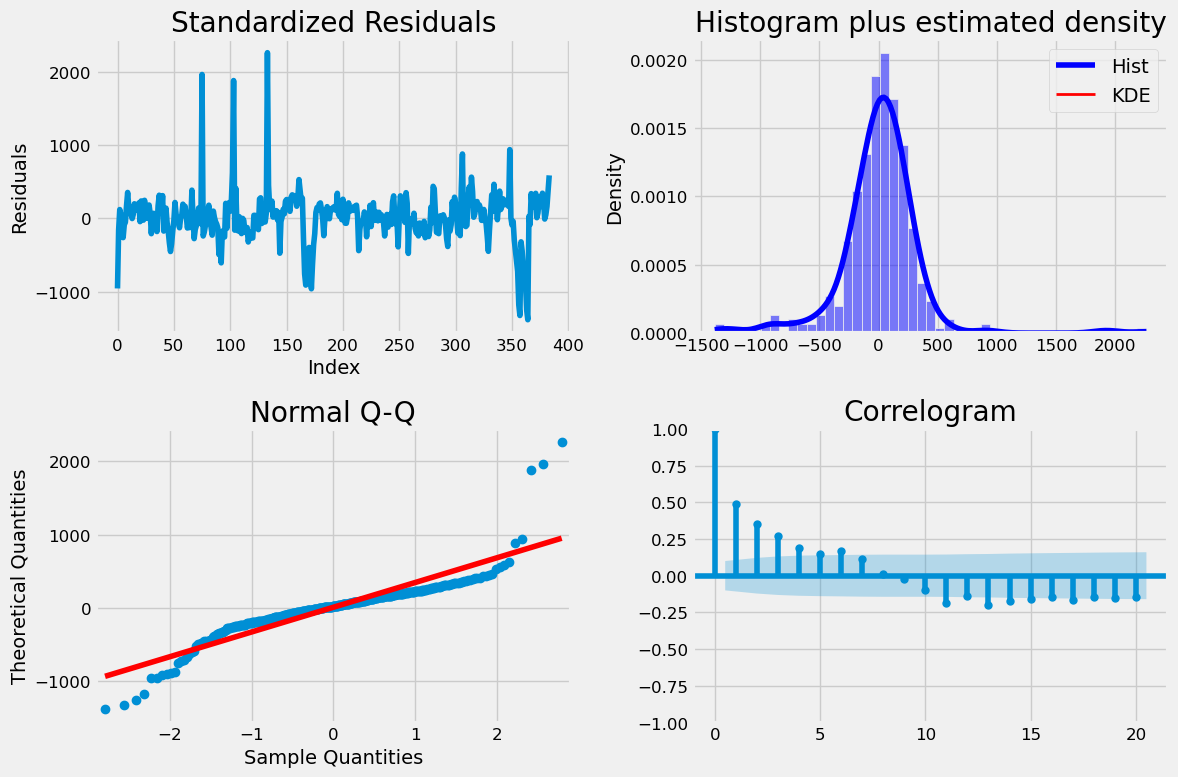

In [122]:
import seaborn as sns

# Qalıqları hesablayın
residuals = df_pr_neupt['y'] - forecast_pr_neupt['yhat1'][:len(df_pr_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [123]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss         MAE        RMSE      Loss  RegLoss  epoch
0     0.502315       0.0  531.922668  708.591553  0.502315      0.0      0
1     0.076848       0.0  385.805328  484.326508  0.076848      0.0      1
2     0.076518       0.0  318.632782  425.668365  0.076518      0.0      2
3     0.065044       0.0  274.316681  379.456146  0.065044      0.0      3
4     0.050799       0.0  252.276993  360.370728  0.050799      0.0      4
5     0.049731       0.0  284.720734  393.325714  0.049731      0.0      5
6     0.044068       0.0  281.454468  391.582733  0.044068      0.0      6
7     0.074925       0.0  398.696930  516.148926  0.074925      0.0      7
8     0.073121       0.0  349.391693  465.399261  0.073121      0.0      8
9     0.106167       0.0  490.527100  634.461548  0.106167      0.0      9
10    0.099304       0.0  396.284027  507.375275  0.099304      0.0     10
11    0.119820       0.0  497.306641  640.103333  0.119820      0.0     11
12    0.130233       0.0 

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [124]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 211.8394775390625
Final RMSE: 306.6955871582031


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [125]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_pr_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_pr_neupt['yhat1'][:len(df_pr_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.736821811088176
Mean Absolute Error (MAE): 210.5609994370383
Mean Absolute Percentage Error (MAPE): 0.09730855317011895
Mean Squared Error (MSE): 114057.81888910312
Root Mean Squared Error (RMSE): 337.72447185405906


### Difference show with Real and Pred

In [126]:
pd.DataFrame({'date': df_pr_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst        diff
0   2015-01-01  1414.0  2371.404297 -957.404297
1   2015-01-02  1920.0  2077.841797 -157.841797
2   2015-01-03  1338.0  1217.123657  120.876343
3   2015-01-04  1404.0  1355.635742   48.364258
4   2015-01-05  2264.0  2394.313965 -130.313965
..         ...     ...          ...         ...
379 2016-01-16  1644.0  1653.590088   -9.590088
380 2016-01-17  1836.0  1786.717285   49.282715
381 2016-01-18  2983.0  2820.410889  162.589111
382 2016-01-19  3389.0  3009.728516  379.271484
383 2016-01-20  3559.0  2971.213867  587.786133

[384 rows x 4 columns]

### Only Forecast Data

In [127]:
forecast_pr_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  2808.874023  1598.472412  3540.562500  2505.322754   
385 2016-01-22 NaN  2509.423584  1293.583252  2839.272949  2503.723145   
386 2016-01-23 NaN  1642.220215   823.060547  1846.908691  2502.123779   
387 2016-01-24 NaN  1775.695923   900.578613  1986.551514  2500.524414   
388 2016-01-25 NaN  2808.466797  1729.873047  3140.238281  2498.924805   

     season_weekly  
384     303.551422  
385       5.700272  
386    -859.903687  
387    -724.828552  
388     309.541901

## Time Series Modeling with NeuarlProphet vs Optuna

In [128]:
# !pip install neuralprophet

In [129]:
# !pip install plotly-resampler

In [130]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [133]:
df_byopt_neupt = copy.deepcopy(df)
df_byopt_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_byopt_neupt

ds       y
0   2015-01-01  1414.0
1   2015-01-02  1920.0
2   2015-01-03  1338.0
3   2015-01-04  1404.0
4   2015-01-05  2264.0
..         ...     ...
379 2016-01-16  1644.0
380 2016-01-17  1836.0
381 2016-01-18  2983.0
382 2016-01-19  3389.0
383 2016-01-20  3559.0

[384 rows x 2 columns]

### BayesianOptimization error verir

In [169]:
# !pip install bayesian-optimization 

In [170]:
# import pandas as pd
# from prophet import Prophet
# from prophet.diagnostics import cross_validation
# from prophet.diagnostics import performance_metrics
# from bayes_opt import BayesianOptimization

# # Modelin optimizasiyası üçün funksiya təyin edir
# def optimization_function(n_changepoints, changepoints_range, trend_reg, seasonality_reg):
    
#     # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
# #     if seasonality_mode == 0:
# #         seasonality_mode_str = 'additive'
# #     else:
# #         seasonality_mode_str = 'multiplicative'
    
#     model = NeuralProphet(
#         # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
#         growth="linear",
#         # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
#         changepoints=None,
#         # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
#         n_changepoints=int(n_changepoints),
#         # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
#         changepoints_range=changepoints_range,
#         # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
#         trend_reg=trend_reg,
#         # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
#         trend_reg_threshold=False,
#         # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         yearly_seasonality="auto",
#         # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         weekly_seasonality="auto",
#         # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
#         daily_seasonality="auto",
#         # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
#         seasonality_mode='additive',
#         # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
#         seasonality_reg=0,
#         # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
#         n_forecasts=1,
#         # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
#         n_lags=0,
#         # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
#         loss_func="Huber",
#         # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
#         normalize="auto",
#         # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
#         impute_missing=True,
#         # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#     #   num_hidden_layers=0,
#         # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#     #   d_hidden=None,     
#         # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#     #   ar_sparsity=None,
#         learning_rate=0.2860695020497939,
#         epochs=40   
#     )
    
#     metrics=model.fit(df_by_optneupt, freq="D")
    
#     # Modeli cross-validation metodundan keçirir
#     cross_val = cross_validation(model, horizon='30 days', parallel='processes')
    
#     # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
#     perf_m = performance_metrics(cross_val, rolling_window=1)

#     # RMSE dəyərini qaytarır
#     rmse = (perf_m['rmse'].values[0])
    
#     return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# # Optimizasiya parametrlərini təyin edin
# parameters = {
#             "n_changepoints": [1, 5],  # Dəyişiklik nöqtələrinin sayı kiçik aralıqlarda dəyişir
#             "changepoints_range": [0.8, 0.9],  # 80-90% aralığında dəyişiklik nöqtələrinin yerləşdirilməsi
#             "trend_reg": [0, 0.2],  # Trend üçün cərimə, regulyarizasiya dəyərləri kiçik tutulur
#             "seasonality_reg": [0, 0.2],  # Sezonsallıq üçün cərimə
# #             "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
#             }

# # BayesianOptimization obyektini yaradın
# optimizer = BayesianOptimization(
#     f=optimization_function,  # Optimizasiya ediləcək funksiya
#     pbounds=parameters,  # Parametrlərin aralığı
#     random_state=42  # Təsadüfi vəziyyət
# )

# # Optimizasiyanı yerinə yetirin
# optimizer.maximize(
#     init_points=5,  # Başlanğıc nöqtələrinin sayı
#     n_iter=20,  # İterasiya sayısı
# )

# # Nəticələri çap edin
# print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir

#### AttributeError: 'NeuralProphet' object has no attribute 'history'- bu error-u aradan qaldira bilmedim

### Optuna

In [173]:
import optuna
from neuralprophet import NeuralProphet

def objective(trial):
    # Parametrlərin Optuna ilə seçimi
    n_changepoints = trial.suggest_int("n_changepoints", 3, 5)
    changepoints_range = trial.suggest_float("changepoints_range", 0.8, 0.9)
    trend_reg = trial.suggest_float("trend_reg", 0, 0.5)
    seasonality_reg = trial.suggest_float("seasonality_reg", 0, 0.5)
    n_lags = trial.suggest_int("n_lags", 0, 3)

    # Model qurulması
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
        growth="linear",
        # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
        changepoints=None,
        # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
        n_changepoints=n_changepoints,
        # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
        changepoints_range=changepoints_range,
        # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
        trend_reg=trend_reg,
        # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
        trend_reg_threshold=False,
        # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        yearly_seasonality="auto",
        # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        weekly_seasonality="auto",
        # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
        daily_seasonality="auto",
        # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
        seasonality_mode="additive",
        # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
        seasonality_reg=seasonality_reg,
        # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
        n_forecasts=1,
        # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
        n_lags=n_lags,
        # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
        loss_func="Huber",
        # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
        normalize="auto",
        # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
        impute_missing=True
        # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
    #   num_hidden_layers=0,
        # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
    #   d_hidden=None,     
        # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
    #   ar_sparsity=None,  
    )
    
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.9)  # learning rate üçün axtarış
    
    # Modelin təlimi və proqnozlar
    metrics = model.fit(df_byopt_neupt,
        learning_rate=learning_rate,  # learning rate parametri Optuna ilə axtarılır
        epochs=40,           
        freq="D",)
    
    # Məqsəd metrikası olaraq zərəri geri qaytarmaq
    return metrics['RMSE'].iloc[-1]   # RMSE və ya başqa metrika ola bilər

# Optuna ilə axtarış
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)  # 10 sınaq keçirin

# Ən yaxşı parametrləri əldə edin
best_params = study.best_params
print(best_params)

[I 2024-10-24 01:13:09,252] A new study created in memory with name: no-name-142385e2-ade1-453b-81ef-0742a2bb2239


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:13:44,042] Trial 0 finished with value: 370.9364929199219 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8001490585340745, 'trend_reg': 0.41099368446332724, 'seasonality_reg': 0.1507614839140865, 'n_lags': 0, 'learning_rate': 0.06285931568596344}. Best is trial 0 with value: 370.9364929199219.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:14:21,862] Trial 1 finished with value: 291.27984619140625 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8498990855612345, 'trend_reg': 0.4198554259625664, 'seasonality_reg': 0.3312636011561369, 'n_lags': 2, 'learning_rate': 0.006743785051549279}. Best is trial 1 with value: 291.27984619140625.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:15:00,986] Trial 2 finished with value: 419.5927734375 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.806192840073787, 'trend_reg': 0.20923445464896423, 'seasonality_reg': 0.35900262309226927, 'n_lags': 0, 'learning_rate': 0.5096603435790362}. Best is trial 1 with value: 291.27984619140625.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:15:40,131] Trial 3 finished with value: 427.1570129394531 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8985364209998083, 'trend_reg': 0.16423383427832516, 'seasonality_reg': 0.47585751215955574, 'n_lags': 0, 'learning_rate': 0.5468765316927626}. Best is trial 1 with value: 291.27984619140625.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:16:19,308] Trial 4 finished with value: 269.8053894042969 and parameters: {'n_changepoints': 5, 'changepoints_range': 0.8797771077386471, 'trend_reg': 0.18104296458940367, 'seasonality_reg': 0.387964773620323, 'n_lags': 2, 'learning_rate': 0.07355825692533487}. Best is trial 4 with value: 269.8053894042969.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:16:52,887] Trial 5 finished with value: 2235.85400390625 and parameters: {'n_changepoints': 5, 'changepoints_range': 0.8642762932794383, 'trend_reg': 0.00892369421075051, 'seasonality_reg': 0.48653368083868054, 'n_lags': 1, 'learning_rate': 0.0012443204507945282}. Best is trial 4 with value: 269.8053894042969.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:17:27,545] Trial 6 finished with value: 283.84283447265625 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8149350091810251, 'trend_reg': 0.09886172319883407, 'seasonality_reg': 0.29543178671362136, 'n_lags': 2, 'learning_rate': 0.02760146487291813}. Best is trial 4 with value: 269.8053894042969.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:18:03,755] Trial 7 finished with value: 262.1560363769531 and parameters: {'n_changepoints': 5, 'changepoints_range': 0.8021458093938391, 'trend_reg': 0.12401950874035467, 'seasonality_reg': 0.3891079302149226, 'n_lags': 3, 'learning_rate': 0.14547139360033604}. Best is trial 7 with value: 262.1560363769531.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:18:38,476] Trial 8 finished with value: 475.0875244140625 and parameters: {'n_changepoints': 3, 'changepoints_range': 0.8259433491128723, 'trend_reg': 0.19229056018783397, 'seasonality_reg': 0.49612679152450867, 'n_lags': 0, 'learning_rate': 0.002375366096445776}. Best is trial 7 with value: 262.1560363769531.


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-24 01:19:14,373] Trial 9 finished with value: 276.0381164550781 and parameters: {'n_changepoints': 4, 'changepoints_range': 0.8635673290633967, 'trend_reg': 0.27020209719719973, 'seasonality_reg': 0.44855319137172556, 'n_lags': 2, 'learning_rate': 0.38205618277503933}. Best is trial 7 with value: 262.1560363769531.


{'n_changepoints': 5, 'changepoints_range': 0.8021458093938391, 'trend_reg': 0.12401950874035467, 'seasonality_reg': 0.3891079302149226, 'n_lags': 3, 'learning_rate': 0.14547139360033604}


### Creat Model NeuralProphet with Best Parameters

In [325]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8021458093938391,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0.12401950874035467,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0.3891079302149226,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

model.set_plotting_backend("plotly-static")

metrics = model.fit(df_byopt_neupt,
    learning_rate= 0.145471393600336042,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [327]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_byopt_neupt, periods=30, n_historic_predictions=len(df_byopt_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_byopt_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [328]:
forecast_byopt_neupt

ds       y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
0   2015-01-01  1414.0  2687.375977  1742.036133  3672.929199  2374.057617   
1   2015-01-02  1920.0  2382.532227  1441.472412  3027.727051  2372.323486   
2   2015-01-03  1338.0  1503.197998  1247.402466  1989.173828  2370.589355   
3   2015-01-04  1404.0  1638.385742  1351.242310  2080.167236  2368.854980   
4   2015-01-05  2264.0  2681.114746  2133.249756  3316.758301  2367.120605   
..         ...     ...          ...          ...          ...          ...   
409 2016-02-15     NaN  3426.371582  2543.457031  3715.369873  3112.496826   
410 2016-02-16     NaN  3631.808594  2679.338867  4698.318359  3118.705566   
411 2016-02-17     NaN  3572.096191  2608.708984  4205.381836  3124.914307   
412 2016-02-18     NaN  3444.582275  2177.721680  4084.763672  3131.123291   
413 2016-02-19     NaN  3148.420166  1880.573853  3446.873535  3137.332031   

     season_weekly  
0       313.318420  
1        10.208749  
2      -867.391113  
3      -730.469360  
4       313.994019  
..             ...  
409     313.874786  
410     513.102844  
411     447.181946  
412     313.458954  
413      11.088059  

[414 rows x 7 columns]

In [329]:
forecast_byopt_neupt[-30:].head()

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  3270.746582  2021.723999  3926.688965  2957.276611   
385 2016-01-22 NaN  2973.751709  1724.176880  3287.865479  2963.485596   
386 2016-01-23 NaN  2101.642578  1533.380371  2255.142334  2969.694336   
387 2016-01-24 NaN  2245.507324  1640.949951  2353.373535  2975.903076   
388 2016-01-25 NaN  3296.054932  2426.417480  3596.621826  2982.112061   

     season_weekly  
384     313.470032  
385      10.266011  
386    -868.051880  
387    -730.395691  
388     313.942719

### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

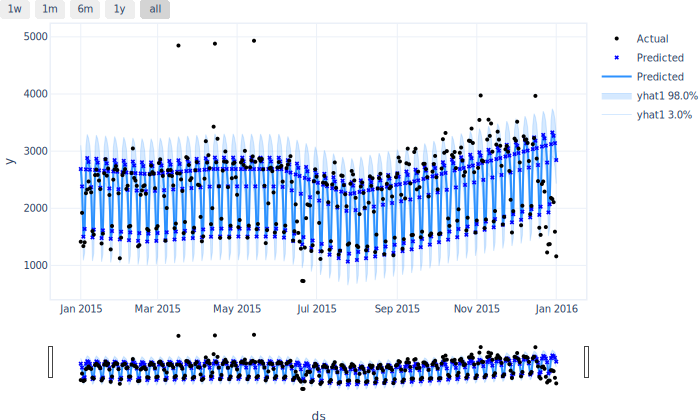

In [330]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_byopt_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


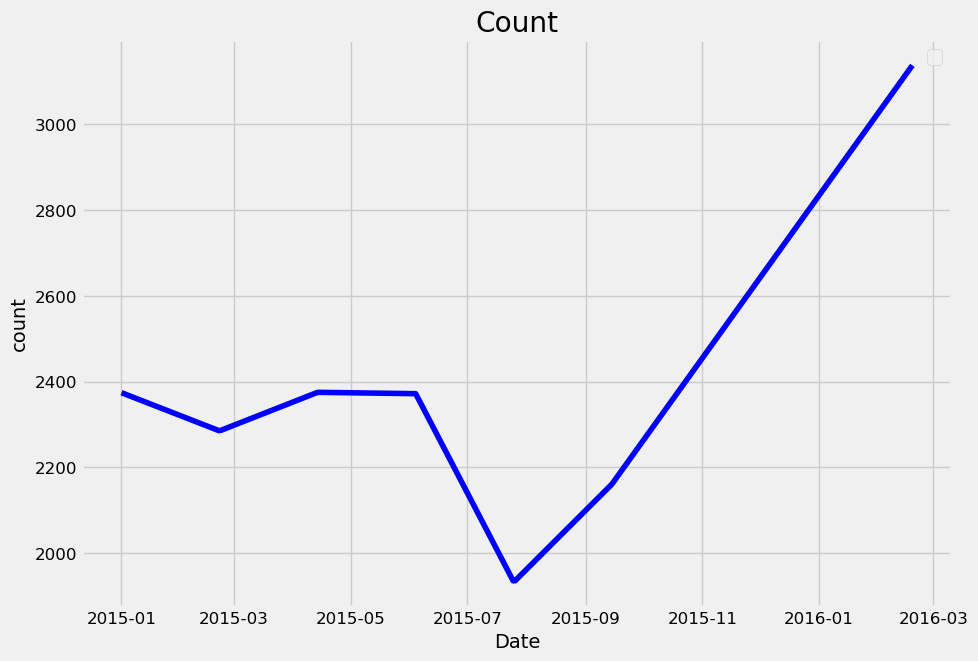

In [331]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_byopt_neupt['ds'], forecast_byopt_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

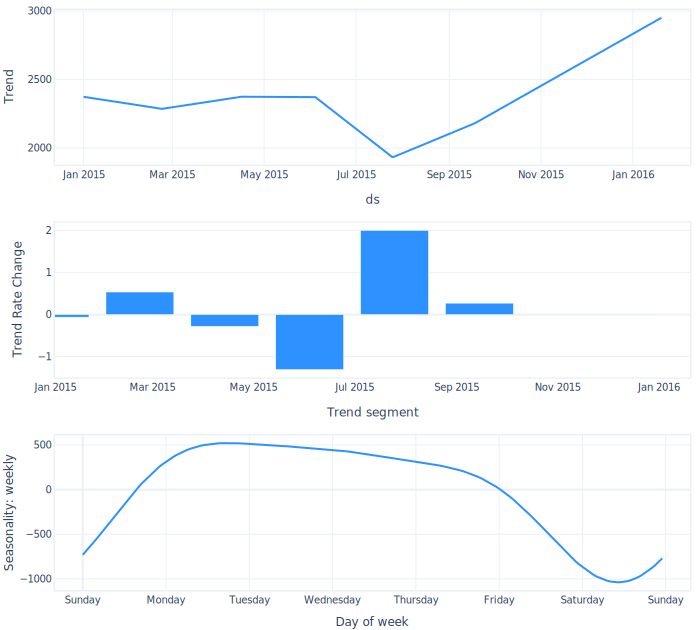

In [332]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır¶

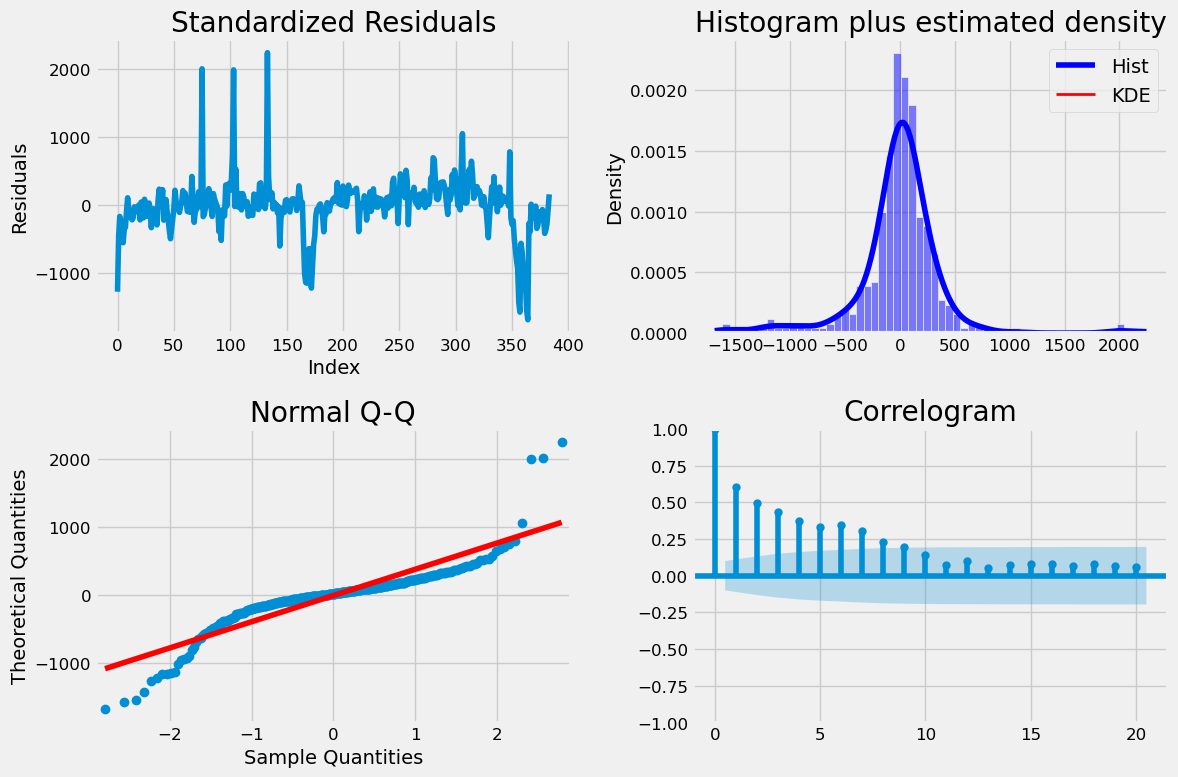

In [333]:
import seaborn as sns

# Qalıqları hesablayın
residuals = df_byopt_neupt['y'] - forecast_byopt_neupt['yhat1'][:len(df_byopt_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [334]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss          MAE         RMSE      Loss   RegLoss  epoch
0     0.673019  0.000000  1401.088989  1712.881348  0.673019  0.000000      0
1     0.194780  0.000000   783.023438   951.395752  0.194780  0.000000      1
2     0.113151  0.000000   497.775482   618.778931  0.113151  0.000000      2
3     0.075233  0.000000   319.000885   421.678925  0.075233  0.000000      3
4     0.071350  0.000000   332.419250   444.602142  0.071350  0.000000      4
5     0.054660  0.000000   301.446167   412.379272  0.054660  0.000000      5
6     0.053557  0.000000   308.789612   422.541534  0.053557  0.000000      6
7     0.056526  0.000000   315.865143   436.620880  0.056526  0.000000      7
8     0.072653  0.000000   390.409332   516.167175  0.072653  0.000000      8
9     0.075449  0.000000   389.757324   519.968567  0.075449  0.000000      9
10    0.079492  0.000000   392.866730   517.241516  0.079492  0.000000     10
11    0.069162  0.000000   372.709229   496.410431  0.069162  0.

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:¶

In [335]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 229.2799530029297
Final RMSE: 356.4745178222656


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [336]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_byopt_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_byopt_neupt['yhat1'][:len(df_byopt_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.6571055428268449
Mean Absolute Error (MAE): 228.3070289729677
Mean Absolute Percentage Error (MAPE): 0.10984650102103648
Mean Squared Error (MSE): 148605.7566397971
Root Mean Squared Error (RMSE): 385.4941719919992


### Difference show with Real and Pred

In [338]:
pd.DataFrame({'date': df_byopt_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

date    real        frcst         diff
0   2015-01-01  1414.0  2687.375977 -1273.375977
1   2015-01-02  1920.0  2382.532227  -462.532227
2   2015-01-03  1338.0  1503.197998  -165.197998
3   2015-01-04  1404.0  1638.385742  -234.385742
4   2015-01-05  2264.0  2681.114746  -417.114746
..         ...     ...          ...          ...
379 2016-01-16  1644.0  2058.339111  -414.339111
380 2016-01-17  1836.0  2201.886230  -365.886230
381 2016-01-18  2983.0  3253.363037  -270.363037
382 2016-01-19  3389.0  3457.966309   -68.966309
383 2016-01-20  3559.0  3398.257324   160.742676

[384 rows x 4 columns]

### Only Forecast Data

In [339]:
forecast_byopt_neupt[-30:].head(5)

ds   y        yhat1   yhat1 3.0%  yhat1 98.0%        trend  \
384 2016-01-21 NaN  3270.746582  2021.723999  3926.688965  2957.276611   
385 2016-01-22 NaN  2973.751709  1724.176880  3287.865479  2963.485596   
386 2016-01-23 NaN  2101.642578  1533.380371  2255.142334  2969.694336   
387 2016-01-24 NaN  2245.507324  1640.949951  2353.373535  2975.903076   
388 2016-01-25 NaN  3296.054932  2426.417480  3596.621826  2982.112061   

     season_weekly  
384     313.470032  
385      10.266011  
386    -868.051880  
387    -730.395691  
388     313.942719